In [1]:
import os

In [2]:
my_path = os.getcwd()

#1. Prepairing the Dataset

In [3]:
label_names = os.listdir()

In [4]:
class_mapping = dict()
class_ = 0
for i in label_names:
  class_mapping[i] = class_
  class_ = class_ + 1

In [5]:
os.getcwd()

'C:\\Users\\Prabal\\Desktop\\IR Project'

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import joblib
import pickle
import pandas as pd 
from matplotlib.pyplot import figure 

In [ ]:
# import matplotlib.pyplot as plt
# X = []
# y = []

# for folders in os.listdir():
#   new_path = os.path.join(path,folders)
#   label = class_mapping[folders]
#   for images in os.listdir(new_path):
#     img = cv2.imread(os.path.join(new_path,images))
#     try:
#       new_img = cv2.resize(img, (224, 224))
#     except Exception as e:
#       print(str(e))
#     X.append(new_img)
#     y.append(label)
#   print('{} Completed'.format(folders))

In [6]:
# # X = np.array(X)
# # y = np.array(y)
# X = np.load(my_path+'\\Data\\X.npy')
# y = np.load(my_path+'\\Data\\y.npy')

In [9]:
# X.shape, y.shape

#Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.shape, X_test.shape

((3544, 224, 224, 3), (1519, 224, 224, 3))

In [ ]:
# np.save('Data/X.npy', X)
# np.save('Data/y.npy',y)

In [ ]:
#Trying from Here

In [29]:
x_train, x_test = X_train / 255.0, X_test / 255.0

In [10]:
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import numpy as np

VGG_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [31]:
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# feature_extractor=VGG_model.predict(x_train)

In [33]:
feature_extractor.shape

(3544, 7, 7, 512)

In [34]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [35]:
features.shape

(3544, 25088)

In [36]:
X_for_training = features #This is our X input to RF

In [38]:
!pip install xgboost

#Classification 

## ResNet50

In [169]:
from keras.preprocessing import image
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import numpy as np

batch_size = 64
num_classes = 17

# base_model = resnet50.ResNet50
# base_model = inception_v3.InceptionV3
base_model = vgg16.VGG16

base_model = base_model(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512,activation = 'relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [52]:
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0  

In [65]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])

X_train = vgg16.preprocess_input(X_train)

print(model.evaluate(X_train, y_train, batch_size=batch_size, verbose=1))
model.fit(X_train, y_train,
          epochs=50,
          batch_size=batch_size,
          shuffle=False,
          validation_data=(X_test, y_test))

56/56 [==============================] - 26s 457ms/step - loss: 2.4273 - acc: 0.4016
[2.6391866207122803, 0.3710496723651886]
Epoch 1/50
56/56 [==============================] - 38s 661ms/step - loss: 2.6847 - acc: 0.3821 - val_loss: 2.8950 - val_acc: 0.2153
Epoch 2/50
56/56 [==============================] - 37s 660ms/step - loss: 1.6650 - acc: 0.5449 - val_loss: 2.8077 - val_acc: 0.2219
Epoch 3/50
56/56 [==============================] - 37s 661ms/step - loss: 1.1600 - acc: 0.6701 - val_loss: 2.8254 - val_acc: 0.2140
Epoch 4/50
56/56 [==============================] - 37s 664ms/step - loss: 0.8550 - acc: 0.7517 - val_loss: 2.8348 - val_acc: 0.2304
Epoch 5/50
56/56 [==============================] - 37s 663ms/step - loss: 0.6936 - acc: 0.7951 - val_loss: 2.8601 - val_acc: 0.2653
Epoch 6/50
56/56 [==============================] - 37s 664ms/step - loss: 0.6654 - acc: 0.7833 - val_loss: 2.8792 - val_acc: 0.2304
Epoch 7/50
56/56 [==============================] - 37s 665ms/step - loss: 0

In [59]:
p  =model.predict(X_test)

In [63]:
y_test

array([ 0, 10, 12, ..., 16,  6,  1], dtype=int64)

In [64]:
p[0]

array([2.1922882e-01, 1.0360672e-02, 4.8623523e-01, 5.0597073e-04,
       2.7847120e-03, 4.8698351e-02, 5.4136356e-03, 2.9683812e-03,
       5.9040233e-02, 2.3660345e-03, 4.5727510e-02, 1.0360456e-03,
       3.7263405e-02, 1.6640134e-02, 3.6938995e-02, 1.3838045e-04,
       2.4653489e-02], dtype=float32)

In [11]:
os.getcwd()

'C:\\Users\\Prabal\\Desktop\\IR Project'

In [12]:
os.getcwd()+'\\Models\\Resnet.h5'

'C:\\Users\\Prabal\\Desktop\\IR Project\\Models\\Resnet.h5'

In [13]:
# model.save(os.getcwd()+'\\Models\\Resnet.h5')

In [19]:
os.listdir()

['.ipynb_checkpoints',
 'Data',
 'defense',
 'Models',
 'New',
 'Part1',
 'Part2',
 'Shradha.ipynb',
 'Testing_IRProject_Prabal.ipynb']

In [29]:
os.getcwd()+'\\Part1\\'

'C:\\Users\\Prabal\\Desktop\\IR Project\\Part1\\'

In [40]:
# os.listdir(os.path.join(dst_path,'All_Souls'))

In [36]:
# os.listdir(os.path.join(src_path,'All_Souls'))

In [32]:
# src_path = 'C:\\Users\\Prabal\\Downloads\\Data_new\\data_b\\Label_Oxford\\'
# dst_path = 'C:\\Users\\Prabal\\Downloads\\Data_new\\data_a\\Label_Oxford\\'

In [41]:
# import shutil
# for folders in os.listdir(src_path):
#     for images in os.listdir(os.path.join(src_path,folders)):
#         s_path = os.path.join(os.path.join(src_path,folders),images)
#         d_path = os.path.join(dst_path,folders)
#         shutil.copy(s_path, d_path)
#     print(folders +' Completed')

All_Souls Completed
Ashmolean Completed
Balliol Completed
Bodleian Completed
Christ_Church Completed
CornMarket Completed
Hertford Completed
Jesus Completed
Keble Completed
Magdalen Completed
New Completed
Oriel Completed
Oxford Completed
Radcliffe_Camera Completed


In [ ]:
#Program Starts From Here 

In [ ]:
import tensorflow as tf

In [8]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [10]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [11]:
test_path = os.getcwd()+'\\Image_data\\christ_church_000085.jpg'
print(test_path)

C:\Users\Prabal\Desktop\IR Project\Image_data\christ_church_000085.jpg


In [5]:
# model.summary()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [13]:
img , x = load_image(test_path)

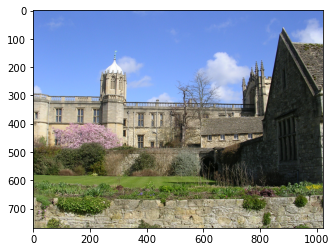

In [14]:
plt.imshow(plt.imread(test_path))

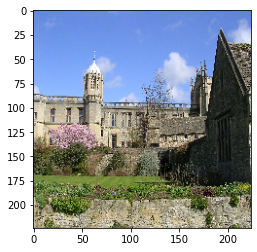

In [15]:
plt.imshow(img)

In [16]:
predictions = model.predict(x)

In [17]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

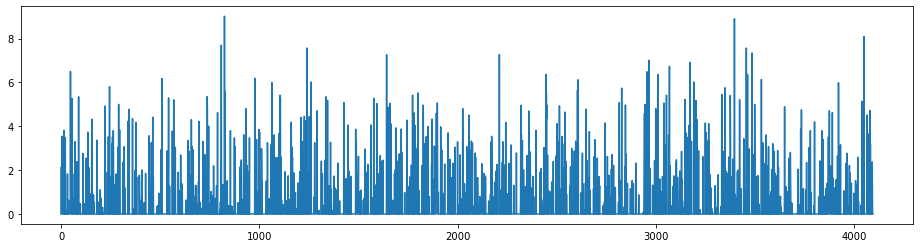

In [125]:
img, x = load_image(test_path)
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [27]:
path = os.getcwd()+'\\Image_data'
temp = []
for name in os.listdir(path):
  temp.append(path+'\\'+name)

In [127]:
len(temp)

5063

In [22]:
# import time
# tic = time.process_time()
# features = []
# for i, image_path in enumerate(temp):
#     print("analyzing image {}".format(i))
#     img, x = load_image(image_path);
#     feat = feat_extractor.predict(x)[0]
#     features.append(feat)

In [ ]:
#Finding n_components from PCA.

In [18]:
'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\VGG16F.npy'

'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\VGG16F.npy'

In [19]:
import numpy as np
# np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\VGG16F.npy',np.array(features))
features = np.load('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\VGG16F.npy')

In [20]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=1000)
pca.fit(features)
pca_features = pca.transform(features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import plotly.express as px
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

In [28]:
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [22]:
type(pca_features)

numpy.ndarray

In [26]:
# import pickle
# filename = 'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\pca'
# pickle.dump(pca, open(filename, 'wb'))

In [27]:
# np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\VGG16PCAF.npy',pca_features)

In [29]:
dict_path = 'C:\\Users\\Prabal\\Desktop\\IR Project\\Label_Oxford\\'
my_dict = dict()
c=0
for folder in os.listdir(dict_path):
    folder = folder.split('_')[0]
    folder = folder.lower()
    my_dict[folder] = c
    c =c+1
def findClass(index):
    return my_dict[temp[index].split('\\')[-1].split('_')[0]]
def getAccuracy(q,r):
    count=0
    for i in r:
        if q ==i:
            count = count+1
    return count*100/len(r)

In [30]:
my_dict

{'all': 0,
 'ashmolean': 1,
 'balliol': 2,
 'bodleian': 3,
 'christ': 4,
 'cornmarket': 5,
 'hertford': 6,
 'jesus': 7,
 'keble': 8,
 'magdalen': 9,
 'new': 10,
 'oriel': 11,
 'oxford': 12,
 'pitt': 13,
 'radcliffe': 14,
 'trinity': 15,
 'worcester': 16}

In [31]:
#Testing Time :
from scipy.spatial import distance
from tqdm import tqdm
def evaluation__(sample_index):
    acc_avg = 0
    time_avg = 0
    query_image_idx = sample_index
    class_q = findClass(query_image_idx)
    class_r = list()
    start = time.perf_counter()
    similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
    thumbs = []
    for idx in idx_closest:
        img = image.load_img(temp[idx])
        class_r.append(findClass(idx))
        img = img.resize((int(img.width * 100 / img.height), 100))
        thumbs.append(img)
    end = time.perf_counter()
    acc_avg = acc_avg + getAccuracy(class_q, class_r)
    time_avg = (end-start)+time_avg
    return (time_avg, acc_avg)

In [33]:
import time
j =0
class_acc  =[]
for class_ in my_dict.keys():
    name = class_
    print(name)
    count =0
    temp_list = list()
    for i in range(j,len(temp)):
        j = j+1
        if(temp[i].split('\\')[-1].split('_')[0] == name):
            if count>4:
                break
            temp_list.append((class_,evaluation__(i)))
            count = count +1
    class_acc.append(temp_list)
    print('Reached index: {}'.format(j))    

all
Reached index: 6
ashmolean
Reached index: 138
balliol
Reached index: 333
bodleian
Reached index: 487
christ
Reached index: 701
cornmarket
Reached index: 1244
hertford
Reached index: 1303
jesus
Reached index: 1370
keble
Reached index: 1531
magdalen
Reached index: 1652
new
Reached index: 2337
oriel
Reached index: 2795
oxford
Reached index: 2890
pitt
Reached index: 4392
radcliffe
Reached index: 4500
trinity
Reached index: 4782
worcester
Reached index: 4999


In [34]:
import pandas as pd
temp_ = list()
for every_class in class_acc:
    a =0
    t =0
    temp2_ = list()
    n = every_class[0][0]
    for i in every_class:
        t = t+i[1][0]
        a = a+i[1][1]
    
    temp2_.append(n)
    temp2_.append(a/5)
    temp2_.append(t/5)
    temp_.append(temp2_)

In [35]:
result_vgg = pd.DataFrame(temp_)
result_vgg.columns = ['Class', 'Accuracy', 'Time']
result_vgg

Class  Accuracy      Time
0          all      24.0  0.391237
1    ashmolean      60.0  0.393208
2      balliol      44.0  0.395825
3     bodleian      52.0  0.398977
4       christ      48.0  0.400394
5   cornmarket      32.0  0.400348
6     hertford      20.0  0.397175
7        jesus       4.0  0.402452
8        keble       8.0  0.408212
9     magdalen      28.0  0.400694
10         new      12.0  0.408229
11       oriel      16.0  0.395984
12      oxford      32.0  0.389588
13        pitt      72.0  0.394868
14   radcliffe      52.0  0.397592
15     trinity      68.0  0.407030
16   worcester       8.0  0.404728

In [160]:
print(temp[query_image_idx])
for i in idx_closest:
    print(temp[i])

C:\Users\Prabal\Desktop\IR Project\Image_data\magdalen_000001.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\magdalen_000014.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\oxford_003335.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\oxford_001320.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\oxford_002471.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\magdalen_000320.jpg


Total time : 0.4683780000000013 seconds
Accuracy is 20.0


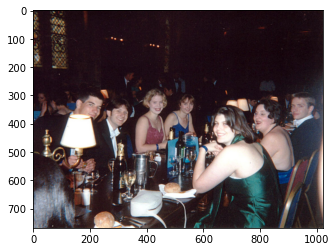

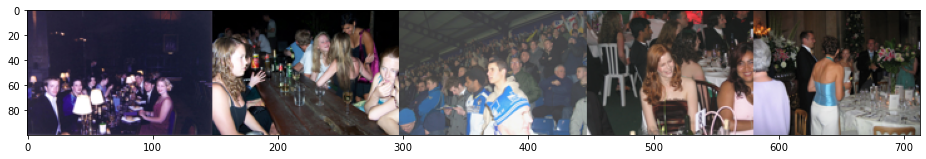

In [36]:
import random
import time
# grab a random query image
query_image_idx = int(3000 * random.random())
class_q = findClass(query_image_idx)
class_r = list()
# let's display the image
img = image.load_img(temp[query_image_idx])

start = time.perf_counter()
plt.imshow(img)
from scipy.spatial import distance
similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
thumbs = []
for idx in idx_closest:
    img = image.load_img(temp[idx])
    class_r.append(findClass(idx))
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

end = time.perf_counter()    
# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)
print('Total time : {} seconds'.format(end-start))
print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))

In [165]:
#Testing Time :
from scipy.spatial import distance
from tqdm import tqdm
def evaluation(n_samples):
    acc_avg = 0
    time_avg = 0
    for i in tqdm(range(n_samples)):
        print(i)
        query_image_idx = int(300 * random.random())
        class_q = findClass(query_image_idx)
        class_r = list()
        start = time.perf_counter()
        similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
        idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
        thumbs = []
        for idx in idx_closest:
            img = image.load_img(temp[idx])
            class_r.append(findClass(idx))
            img = img.resize((int(img.width * 100 / img.height), 100))
            thumbs.append(img)
        end = time.perf_counter()
#         print('Total time : {} seconds'.format(end-start))
#         print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))
        acc_avg = acc_avg + getAccuracy(class_q, class_r)
        time_avg = (end-start)+time_avg
    print('Final accuracy on {} random samples on VGG16 (Oxford) {}'.format(1000, acc_avg/n_samples))
    print('Average time per sample {}'.format(time_avg/n_samples))
evaluation(100)

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

0


  0%|▏                                                                                 | 1/500 [00:00<03:40,  2.27it/s]

1


  0%|▎                                                                                 | 2/500 [00:00<03:32,  2.34it/s]

2


  1%|▍                                                                                 | 3/500 [00:01<03:34,  2.32it/s]

3


  1%|▋                                                                                 | 4/500 [00:01<03:33,  2.32it/s]

4


  1%|▊                                                                                 | 5/500 [00:02<03:31,  2.35it/s]

5


  1%|▉                                                                                 | 6/500 [00:02<03:31,  2.34it/s]

6


  1%|█▏                                                                                | 7/500 [00:02<03:32,  2.32it/s]

7


  2%|█▎                                                                                | 8/500 [00:03<03:31,  2.33it/s]

8


  2%|█▍                                                                                | 9/500 [00:03<03:28,  2.35it/s]

9


  2%|█▌                                                                               | 10/500 [00:04<03:23,  2.41it/s]

10


  2%|█▊                                                                               | 11/500 [00:04<03:20,  2.44it/s]

11


  2%|█▉                                                                               | 12/500 [00:05<03:16,  2.48it/s]

12


  3%|██                                                                               | 13/500 [00:05<03:17,  2.47it/s]

13


  3%|██▎                                                                              | 14/500 [00:05<03:21,  2.41it/s]

14


  3%|██▍                                                                              | 15/500 [00:06<03:21,  2.40it/s]

15


  3%|██▌                                                                              | 16/500 [00:06<03:19,  2.43it/s]

16


  3%|██▊                                                                              | 17/500 [00:07<03:18,  2.43it/s]

17


  4%|██▉                                                                              | 18/500 [00:07<03:19,  2.41it/s]

18


  4%|███                                                                              | 19/500 [00:07<03:20,  2.40it/s]

19


  4%|███▏                                                                             | 20/500 [00:08<03:18,  2.41it/s]

20


  4%|███▍                                                                             | 21/500 [00:08<03:20,  2.39it/s]

21


  4%|███▌                                                                             | 22/500 [00:09<03:19,  2.39it/s]

22


  5%|███▋                                                                             | 23/500 [00:09<03:21,  2.37it/s]

23


  5%|███▉                                                                             | 24/500 [00:10<03:19,  2.38it/s]

24


  5%|████                                                                             | 25/500 [00:10<03:19,  2.39it/s]

25


  5%|████▏                                                                            | 26/500 [00:10<03:16,  2.41it/s]

26


  5%|████▎                                                                            | 27/500 [00:11<03:18,  2.38it/s]

27


  6%|████▌                                                                            | 28/500 [00:11<03:20,  2.36it/s]

28


  6%|████▋                                                                            | 29/500 [00:12<03:14,  2.42it/s]

29


  6%|████▊                                                                            | 30/500 [00:12<03:14,  2.41it/s]

30


  6%|█████                                                                            | 31/500 [00:12<03:14,  2.41it/s]

31


  6%|█████▏                                                                           | 32/500 [00:13<03:12,  2.43it/s]

32


  7%|█████▎                                                                           | 33/500 [00:13<03:12,  2.42it/s]

33


  7%|█████▌                                                                           | 34/500 [00:14<03:12,  2.42it/s]

34


  7%|█████▋                                                                           | 35/500 [00:14<03:13,  2.41it/s]

35


  7%|█████▊                                                                           | 36/500 [00:14<03:10,  2.44it/s]

36


  7%|█████▉                                                                           | 37/500 [00:15<03:11,  2.42it/s]

37


  8%|██████▏                                                                          | 38/500 [00:15<03:10,  2.42it/s]

38


  8%|██████▎                                                                          | 39/500 [00:16<03:09,  2.43it/s]

39


  8%|██████▍                                                                          | 40/500 [00:16<03:08,  2.44it/s]

40


  8%|██████▋                                                                          | 41/500 [00:17<03:11,  2.40it/s]

41


  8%|██████▊                                                                          | 42/500 [00:17<03:07,  2.44it/s]

42


  9%|██████▉                                                                          | 43/500 [00:17<03:08,  2.42it/s]

43


  9%|███████▏                                                                         | 44/500 [00:18<03:04,  2.47it/s]

44


  9%|███████▎                                                                         | 45/500 [00:18<03:06,  2.44it/s]

45


  9%|███████▍                                                                         | 46/500 [00:19<03:05,  2.44it/s]

46


  9%|███████▌                                                                         | 47/500 [00:19<03:05,  2.44it/s]

47


 10%|███████▊                                                                         | 48/500 [00:19<03:09,  2.39it/s]

48


 10%|███████▉                                                                         | 49/500 [00:20<03:07,  2.41it/s]

49


 10%|████████                                                                         | 50/500 [00:20<03:05,  2.43it/s]

50


 10%|████████▎                                                                        | 51/500 [00:21<03:02,  2.46it/s]

51


 10%|████████▍                                                                        | 52/500 [00:21<03:00,  2.49it/s]

52


 11%|████████▌                                                                        | 53/500 [00:21<03:00,  2.48it/s]

53


 11%|████████▋                                                                        | 54/500 [00:22<03:02,  2.44it/s]

54


 11%|████████▉                                                                        | 55/500 [00:22<02:59,  2.47it/s]

55


 11%|█████████                                                                        | 56/500 [00:23<02:57,  2.50it/s]

56


 11%|█████████▏                                                                       | 57/500 [00:23<02:58,  2.48it/s]

57


 12%|█████████▍                                                                       | 58/500 [00:23<02:58,  2.47it/s]

58


 12%|█████████▌                                                                       | 59/500 [00:24<02:57,  2.49it/s]

59


 12%|█████████▋                                                                       | 60/500 [00:24<02:55,  2.51it/s]

60


 12%|█████████▉                                                                       | 61/500 [00:25<02:58,  2.47it/s]

61


 12%|██████████                                                                       | 62/500 [00:25<02:59,  2.44it/s]

62


 13%|██████████▏                                                                      | 63/500 [00:26<03:01,  2.41it/s]

63


 13%|██████████▎                                                                      | 64/500 [00:26<03:01,  2.40it/s]

64


 13%|██████████▌                                                                      | 65/500 [00:26<03:00,  2.41it/s]

65


 13%|██████████▋                                                                      | 66/500 [00:27<02:58,  2.43it/s]

66


 13%|██████████▊                                                                      | 67/500 [00:27<02:59,  2.41it/s]

67


 14%|███████████                                                                      | 68/500 [00:28<03:02,  2.37it/s]

68


 14%|███████████▏                                                                     | 69/500 [00:28<03:00,  2.39it/s]

69


 14%|███████████▎                                                                     | 70/500 [00:28<03:00,  2.38it/s]

70


 14%|███████████▌                                                                     | 71/500 [00:29<03:00,  2.37it/s]

71


 14%|███████████▋                                                                     | 72/500 [00:29<03:00,  2.37it/s]

72


 15%|███████████▊                                                                     | 73/500 [00:30<03:00,  2.37it/s]

73


 15%|███████████▉                                                                     | 74/500 [00:30<02:59,  2.37it/s]

74


 15%|████████████▏                                                                    | 75/500 [00:31<02:55,  2.42it/s]

75


 15%|████████████▎                                                                    | 76/500 [00:31<02:56,  2.40it/s]

76


 15%|████████████▍                                                                    | 77/500 [00:31<02:57,  2.39it/s]

77


 16%|████████████▋                                                                    | 78/500 [00:32<02:59,  2.36it/s]

78


 16%|████████████▊                                                                    | 79/500 [00:32<02:56,  2.38it/s]

79


 16%|████████████▉                                                                    | 80/500 [00:33<02:52,  2.43it/s]

80


 16%|█████████████                                                                    | 81/500 [00:33<02:50,  2.46it/s]

81


 16%|█████████████▎                                                                   | 82/500 [00:33<02:55,  2.38it/s]

82


 17%|█████████████▍                                                                   | 83/500 [00:34<02:55,  2.37it/s]

83


 17%|█████████████▌                                                                   | 84/500 [00:34<02:51,  2.42it/s]

84


 17%|█████████████▊                                                                   | 85/500 [00:35<02:50,  2.43it/s]

85


 17%|█████████████▉                                                                   | 86/500 [00:35<02:51,  2.41it/s]

86


 17%|██████████████                                                                   | 87/500 [00:36<02:52,  2.40it/s]

87


 18%|██████████████▎                                                                  | 88/500 [00:36<02:50,  2.41it/s]

88


 18%|██████████████▍                                                                  | 89/500 [00:36<02:48,  2.44it/s]

89


 18%|██████████████▌                                                                  | 90/500 [00:37<02:47,  2.45it/s]

90


 18%|██████████████▋                                                                  | 91/500 [00:37<02:47,  2.45it/s]

91


 18%|██████████████▉                                                                  | 92/500 [00:38<02:48,  2.42it/s]

92


 19%|███████████████                                                                  | 93/500 [00:38<02:49,  2.40it/s]

93


 19%|███████████████▏                                                                 | 94/500 [00:38<02:49,  2.39it/s]

94


 19%|███████████████▍                                                                 | 95/500 [00:39<02:48,  2.41it/s]

95


 19%|███████████████▌                                                                 | 96/500 [00:39<02:47,  2.41it/s]

96


 19%|███████████████▋                                                                 | 97/500 [00:40<02:50,  2.36it/s]

97


 20%|███████████████▉                                                                 | 98/500 [00:40<02:48,  2.38it/s]

98


 20%|████████████████                                                                 | 99/500 [00:41<02:46,  2.41it/s]

99


 20%|████████████████                                                                | 100/500 [00:41<02:45,  2.42it/s]

100


 20%|████████████████▏                                                               | 101/500 [00:41<02:44,  2.43it/s]

101


 20%|████████████████▎                                                               | 102/500 [00:42<02:41,  2.46it/s]

102


 21%|████████████████▍                                                               | 103/500 [00:42<02:44,  2.42it/s]

103


 21%|████████████████▋                                                               | 104/500 [00:43<02:43,  2.42it/s]

104


 21%|████████████████▊                                                               | 105/500 [00:43<02:40,  2.46it/s]

105


 21%|████████████████▉                                                               | 106/500 [00:43<02:41,  2.43it/s]

106


 21%|█████████████████                                                               | 107/500 [00:44<02:40,  2.46it/s]

107


 22%|█████████████████▎                                                              | 108/500 [00:44<02:37,  2.48it/s]

108


 22%|█████████████████▍                                                              | 109/500 [00:45<02:38,  2.47it/s]

109


 22%|█████████████████▌                                                              | 110/500 [00:45<02:39,  2.44it/s]

110


 22%|█████████████████▊                                                              | 111/500 [00:45<02:39,  2.43it/s]

111


 22%|█████████████████▉                                                              | 112/500 [00:46<02:40,  2.42it/s]

112


 23%|██████████████████                                                              | 113/500 [00:46<02:42,  2.38it/s]

113


 23%|██████████████████▏                                                             | 114/500 [00:47<02:38,  2.43it/s]

114


 23%|██████████████████▍                                                             | 115/500 [00:47<02:38,  2.43it/s]

115


 23%|██████████████████▌                                                             | 116/500 [00:47<02:37,  2.44it/s]

116


 23%|██████████████████▋                                                             | 117/500 [00:48<02:34,  2.47it/s]

117


 24%|██████████████████▉                                                             | 118/500 [00:48<02:36,  2.45it/s]

118


 24%|███████████████████                                                             | 119/500 [00:49<02:39,  2.39it/s]

119


 24%|███████████████████▏                                                            | 120/500 [00:49<02:39,  2.38it/s]

120


 24%|███████████████████▎                                                            | 121/500 [00:50<02:37,  2.40it/s]

121


 24%|███████████████████▌                                                            | 122/500 [00:50<02:35,  2.43it/s]

122


 25%|███████████████████▋                                                            | 123/500 [00:50<02:35,  2.43it/s]

123


 25%|███████████████████▊                                                            | 124/500 [00:51<02:34,  2.43it/s]

124


 25%|████████████████████                                                            | 125/500 [00:51<02:32,  2.46it/s]

125


 25%|████████████████████▏                                                           | 126/500 [00:52<02:33,  2.43it/s]

126


 25%|████████████████████▎                                                           | 127/500 [00:52<02:34,  2.41it/s]

127


 26%|████████████████████▍                                                           | 128/500 [00:52<02:33,  2.42it/s]

128


 26%|████████████████████▋                                                           | 129/500 [00:53<02:33,  2.41it/s]

129


 26%|████████████████████▊                                                           | 130/500 [00:53<02:34,  2.40it/s]

130


 26%|████████████████████▉                                                           | 131/500 [00:54<02:32,  2.41it/s]

131


 26%|█████████████████████                                                           | 132/500 [00:54<02:31,  2.43it/s]

132


 27%|█████████████████████▎                                                          | 133/500 [00:55<02:32,  2.41it/s]

133


 27%|█████████████████████▍                                                          | 134/500 [00:55<02:34,  2.36it/s]

134


 27%|█████████████████████▌                                                          | 135/500 [00:55<02:34,  2.36it/s]

135


 27%|█████████████████████▊                                                          | 136/500 [00:56<02:30,  2.42it/s]

136


 27%|█████████████████████▉                                                          | 137/500 [00:56<02:29,  2.43it/s]

137


 28%|██████████████████████                                                          | 138/500 [00:57<02:33,  2.35it/s]

138


 28%|██████████████████████▏                                                         | 139/500 [00:57<02:31,  2.39it/s]

139


 28%|██████████████████████▍                                                         | 140/500 [00:57<02:28,  2.43it/s]

140


 28%|██████████████████████▌                                                         | 141/500 [00:58<02:28,  2.41it/s]

141


 28%|██████████████████████▋                                                         | 142/500 [00:58<02:29,  2.40it/s]

142


 29%|██████████████████████▉                                                         | 143/500 [00:59<02:31,  2.36it/s]

143


 29%|███████████████████████                                                         | 144/500 [00:59<02:29,  2.38it/s]

144


 29%|███████████████████████▏                                                        | 145/500 [01:00<02:27,  2.41it/s]

145


 29%|███████████████████████▎                                                        | 146/500 [01:00<02:26,  2.42it/s]

146


 29%|███████████████████████▌                                                        | 147/500 [01:00<02:25,  2.43it/s]

147


 30%|███████████████████████▋                                                        | 148/500 [01:01<02:22,  2.46it/s]

148


 30%|███████████████████████▊                                                        | 149/500 [01:01<02:23,  2.44it/s]

149


 30%|████████████████████████                                                        | 150/500 [01:02<02:26,  2.38it/s]

150


 30%|████████████████████████▏                                                       | 151/500 [01:02<02:22,  2.44it/s]

151


 30%|████████████████████████▎                                                       | 152/500 [01:02<02:23,  2.43it/s]

152


 31%|████████████████████████▍                                                       | 153/500 [01:03<02:20,  2.47it/s]

153


 31%|████████████████████████▋                                                       | 154/500 [01:03<02:22,  2.43it/s]

154


 31%|████████████████████████▊                                                       | 155/500 [01:04<02:23,  2.41it/s]

155


 31%|████████████████████████▉                                                       | 156/500 [01:04<02:25,  2.37it/s]

156


 31%|█████████████████████████                                                       | 157/500 [01:05<02:23,  2.39it/s]

157


 32%|█████████████████████████▎                                                      | 158/500 [01:05<02:21,  2.41it/s]

158


 32%|█████████████████████████▍                                                      | 159/500 [01:05<02:22,  2.39it/s]

159


 32%|█████████████████████████▌                                                      | 160/500 [01:06<02:16,  2.49it/s]

160


 32%|█████████████████████████▊                                                      | 161/500 [01:06<02:17,  2.47it/s]

161


 32%|█████████████████████████▉                                                      | 162/500 [01:07<02:16,  2.48it/s]

162


 33%|██████████████████████████                                                      | 163/500 [01:07<02:16,  2.47it/s]

163


 33%|██████████████████████████▏                                                     | 164/500 [01:07<02:19,  2.41it/s]

164


 33%|██████████████████████████▍                                                     | 165/500 [01:08<02:19,  2.39it/s]

165


 33%|██████████████████████████▌                                                     | 166/500 [01:08<02:18,  2.41it/s]

166


 33%|██████████████████████████▋                                                     | 167/500 [01:09<02:19,  2.40it/s]

167


 34%|██████████████████████████▉                                                     | 168/500 [01:09<02:16,  2.44it/s]

168


 34%|███████████████████████████                                                     | 169/500 [01:09<02:15,  2.45it/s]

169


 34%|███████████████████████████▏                                                    | 170/500 [01:10<02:14,  2.45it/s]

170


 34%|███████████████████████████▎                                                    | 171/500 [01:10<02:14,  2.45it/s]

171


 34%|███████████████████████████▌                                                    | 172/500 [01:11<02:13,  2.45it/s]

172


 35%|███████████████████████████▋                                                    | 173/500 [01:11<02:13,  2.45it/s]

173


 35%|███████████████████████████▊                                                    | 174/500 [01:11<02:14,  2.43it/s]

174


 35%|████████████████████████████                                                    | 175/500 [01:12<02:14,  2.41it/s]

175


 35%|████████████████████████████▏                                                   | 176/500 [01:12<02:14,  2.41it/s]

176


 35%|████████████████████████████▎                                                   | 177/500 [01:13<02:14,  2.40it/s]

177


 36%|████████████████████████████▍                                                   | 178/500 [01:13<02:13,  2.41it/s]

178


 36%|████████████████████████████▋                                                   | 179/500 [01:14<02:12,  2.42it/s]

179


 36%|████████████████████████████▊                                                   | 180/500 [01:14<02:10,  2.46it/s]

180


 36%|████████████████████████████▉                                                   | 181/500 [01:14<02:11,  2.43it/s]

181


 36%|█████████████████████████████                                                   | 182/500 [01:15<02:10,  2.43it/s]

182


 37%|█████████████████████████████▎                                                  | 183/500 [01:15<02:14,  2.36it/s]

183


 37%|█████████████████████████████▍                                                  | 184/500 [01:16<02:12,  2.38it/s]

184


 37%|█████████████████████████████▌                                                  | 185/500 [01:16<02:10,  2.41it/s]

185


 37%|█████████████████████████████▊                                                  | 186/500 [01:16<02:09,  2.42it/s]

186


 37%|█████████████████████████████▉                                                  | 187/500 [01:17<02:10,  2.40it/s]

187


 38%|██████████████████████████████                                                  | 188/500 [01:17<02:07,  2.44it/s]

188


 38%|██████████████████████████████▏                                                 | 189/500 [01:18<02:07,  2.45it/s]

189


 38%|██████████████████████████████▍                                                 | 190/500 [01:18<02:06,  2.45it/s]

190


 38%|██████████████████████████████▌                                                 | 191/500 [01:18<02:06,  2.45it/s]

191


 38%|██████████████████████████████▋                                                 | 192/500 [01:19<02:03,  2.49it/s]

192


 39%|██████████████████████████████▉                                                 | 193/500 [01:19<02:05,  2.45it/s]

193


 39%|███████████████████████████████                                                 | 194/500 [01:20<02:05,  2.44it/s]

194


 39%|███████████████████████████████▏                                                | 195/500 [01:20<02:04,  2.44it/s]

195


 39%|███████████████████████████████▎                                                | 196/500 [01:21<02:05,  2.42it/s]

196


 39%|███████████████████████████████▌                                                | 197/500 [01:21<02:04,  2.43it/s]

197


 40%|███████████████████████████████▋                                                | 198/500 [01:21<02:04,  2.44it/s]

198


 40%|███████████████████████████████▊                                                | 199/500 [01:22<02:04,  2.42it/s]

199


 40%|████████████████████████████████                                                | 200/500 [01:22<02:03,  2.43it/s]

200


 40%|████████████████████████████████▏                                               | 201/500 [01:23<02:01,  2.45it/s]

201


 40%|████████████████████████████████▎                                               | 202/500 [01:23<02:01,  2.44it/s]

202


 41%|████████████████████████████████▍                                               | 203/500 [01:23<02:01,  2.45it/s]

203


 41%|████████████████████████████████▋                                               | 204/500 [01:24<02:01,  2.43it/s]

204


 41%|████████████████████████████████▊                                               | 205/500 [01:24<02:01,  2.43it/s]

205


 41%|████████████████████████████████▉                                               | 206/500 [01:25<02:02,  2.41it/s]

206


 41%|█████████████████████████████████                                               | 207/500 [01:25<02:03,  2.37it/s]

207


 42%|█████████████████████████████████▎                                              | 208/500 [01:26<02:01,  2.40it/s]

208


 42%|█████████████████████████████████▍                                              | 209/500 [01:26<02:01,  2.40it/s]

209


 42%|█████████████████████████████████▌                                              | 210/500 [01:26<02:01,  2.39it/s]

210


 42%|█████████████████████████████████▊                                              | 211/500 [01:27<02:01,  2.39it/s]

211


 42%|█████████████████████████████████▉                                              | 212/500 [01:27<01:59,  2.42it/s]

212


 43%|██████████████████████████████████                                              | 213/500 [01:28<01:59,  2.41it/s]

213


 43%|██████████████████████████████████▏                                             | 214/500 [01:28<01:58,  2.42it/s]

214


 43%|██████████████████████████████████▍                                             | 215/500 [01:28<01:57,  2.43it/s]

215


 43%|██████████████████████████████████▌                                             | 216/500 [01:29<02:00,  2.36it/s]

216


 43%|██████████████████████████████████▋                                             | 217/500 [01:29<01:59,  2.37it/s]

217


 44%|██████████████████████████████████▉                                             | 218/500 [01:30<01:58,  2.38it/s]

218


 44%|███████████████████████████████████                                             | 219/500 [01:30<01:59,  2.35it/s]

219


 44%|███████████████████████████████████▏                                            | 220/500 [01:31<01:57,  2.39it/s]

220


 44%|███████████████████████████████████▎                                            | 221/500 [01:31<01:56,  2.39it/s]

221


 44%|███████████████████████████████████▌                                            | 222/500 [01:31<01:56,  2.39it/s]

222


 45%|███████████████████████████████████▋                                            | 223/500 [01:32<01:55,  2.40it/s]

223


 45%|███████████████████████████████████▊                                            | 224/500 [01:32<01:55,  2.40it/s]

224


 45%|████████████████████████████████████                                            | 225/500 [01:33<01:55,  2.39it/s]

225


 45%|████████████████████████████████████▏                                           | 226/500 [01:33<01:53,  2.41it/s]

226


 45%|████████████████████████████████████▎                                           | 227/500 [01:33<01:54,  2.39it/s]

227


 46%|████████████████████████████████████▍                                           | 228/500 [01:34<01:55,  2.35it/s]

228


 46%|████████████████████████████████████▋                                           | 229/500 [01:34<01:53,  2.38it/s]

229


 46%|████████████████████████████████████▊                                           | 230/500 [01:35<01:52,  2.40it/s]

230


 46%|████████████████████████████████████▉                                           | 231/500 [01:35<01:53,  2.37it/s]

231


 46%|█████████████████████████████████████                                           | 232/500 [01:36<01:51,  2.41it/s]

232


 47%|█████████████████████████████████████▎                                          | 233/500 [01:36<01:51,  2.39it/s]

233


 47%|█████████████████████████████████████▍                                          | 234/500 [01:36<01:50,  2.40it/s]

234


 47%|█████████████████████████████████████▌                                          | 235/500 [01:37<01:49,  2.42it/s]

235


 47%|█████████████████████████████████████▊                                          | 236/500 [01:37<01:49,  2.40it/s]

236


 47%|█████████████████████████████████████▉                                          | 237/500 [01:38<01:48,  2.43it/s]

237


 48%|██████████████████████████████████████                                          | 238/500 [01:38<01:48,  2.41it/s]

238


 48%|██████████████████████████████████████▏                                         | 239/500 [01:38<01:47,  2.42it/s]

239


 48%|██████████████████████████████████████▍                                         | 240/500 [01:39<01:46,  2.43it/s]

240


 48%|██████████████████████████████████████▌                                         | 241/500 [01:39<01:47,  2.42it/s]

241


 48%|██████████████████████████████████████▋                                         | 242/500 [01:40<01:47,  2.40it/s]

242


 49%|██████████████████████████████████████▉                                         | 243/500 [01:40<01:46,  2.42it/s]

243


 49%|███████████████████████████████████████                                         | 244/500 [01:41<01:46,  2.41it/s]

244


 49%|███████████████████████████████████████▏                                        | 245/500 [01:41<01:44,  2.43it/s]

245


 49%|███████████████████████████████████████▎                                        | 246/500 [01:41<01:44,  2.44it/s]

246


 49%|███████████████████████████████████████▌                                        | 247/500 [01:42<01:44,  2.43it/s]

247


 50%|███████████████████████████████████████▋                                        | 248/500 [01:42<01:43,  2.44it/s]

248


 50%|███████████████████████████████████████▊                                        | 249/500 [01:43<01:43,  2.43it/s]

249


 50%|████████████████████████████████████████                                        | 250/500 [01:43<01:42,  2.44it/s]

250


 50%|████████████████████████████████████████▏                                       | 251/500 [01:43<01:41,  2.44it/s]

251


 50%|████████████████████████████████████████▎                                       | 252/500 [01:44<01:41,  2.44it/s]

252


 51%|████████████████████████████████████████▍                                       | 253/500 [01:44<01:40,  2.46it/s]

253


 51%|████████████████████████████████████████▋                                       | 254/500 [01:45<01:40,  2.46it/s]

254


 51%|████████████████████████████████████████▊                                       | 255/500 [01:45<01:39,  2.45it/s]

255


 51%|████████████████████████████████████████▉                                       | 256/500 [01:45<01:38,  2.47it/s]

256


 51%|█████████████████████████████████████████                                       | 257/500 [01:46<01:39,  2.45it/s]

257


 52%|█████████████████████████████████████████▎                                      | 258/500 [01:46<01:36,  2.51it/s]

258


 52%|█████████████████████████████████████████▍                                      | 259/500 [01:47<01:36,  2.51it/s]

259


 52%|█████████████████████████████████████████▌                                      | 260/500 [01:47<01:37,  2.47it/s]

260


 52%|█████████████████████████████████████████▊                                      | 261/500 [01:47<01:32,  2.57it/s]

261


 52%|█████████████████████████████████████████▉                                      | 262/500 [01:48<01:33,  2.54it/s]

262


 53%|██████████████████████████████████████████                                      | 263/500 [01:48<01:36,  2.45it/s]

263


 53%|██████████████████████████████████████████▏                                     | 264/500 [01:49<01:35,  2.48it/s]

264


 53%|██████████████████████████████████████████▍                                     | 265/500 [01:49<01:35,  2.47it/s]

265


 53%|██████████████████████████████████████████▌                                     | 266/500 [01:49<01:35,  2.45it/s]

266


 53%|██████████████████████████████████████████▋                                     | 267/500 [01:50<01:34,  2.47it/s]

267


 54%|██████████████████████████████████████████▉                                     | 268/500 [01:50<01:32,  2.49it/s]

268


 54%|███████████████████████████████████████████                                     | 269/500 [01:51<01:33,  2.48it/s]

269


 54%|███████████████████████████████████████████▏                                    | 270/500 [01:51<01:33,  2.47it/s]

270


 54%|███████████████████████████████████████████▎                                    | 271/500 [01:51<01:33,  2.44it/s]

271


 54%|███████████████████████████████████████████▌                                    | 272/500 [01:52<01:32,  2.47it/s]

272


 55%|███████████████████████████████████████████▋                                    | 273/500 [01:52<01:32,  2.44it/s]

273


 55%|███████████████████████████████████████████▊                                    | 274/500 [01:53<01:33,  2.42it/s]

274


 55%|████████████████████████████████████████████                                    | 275/500 [01:53<01:33,  2.41it/s]

275


 55%|████████████████████████████████████████████▏                                   | 276/500 [01:54<01:32,  2.42it/s]

276


 55%|████████████████████████████████████████████▎                                   | 277/500 [01:54<01:31,  2.43it/s]

277


 56%|████████████████████████████████████████████▍                                   | 278/500 [01:54<01:30,  2.44it/s]

278


 56%|████████████████████████████████████████████▋                                   | 279/500 [01:55<01:29,  2.47it/s]

279


 56%|████████████████████████████████████████████▊                                   | 280/500 [01:55<01:30,  2.42it/s]

280


 56%|████████████████████████████████████████████▉                                   | 281/500 [01:56<01:30,  2.42it/s]

281


 56%|█████████████████████████████████████████████                                   | 282/500 [01:56<01:29,  2.44it/s]

282


 57%|█████████████████████████████████████████████▎                                  | 283/500 [01:56<01:29,  2.42it/s]

283


 57%|█████████████████████████████████████████████▍                                  | 284/500 [01:57<01:30,  2.39it/s]

284


 57%|█████████████████████████████████████████████▌                                  | 285/500 [01:57<01:30,  2.38it/s]

285


 57%|█████████████████████████████████████████████▊                                  | 286/500 [01:58<01:29,  2.40it/s]

286


 57%|█████████████████████████████████████████████▉                                  | 287/500 [01:58<01:28,  2.42it/s]

287


 58%|██████████████████████████████████████████████                                  | 288/500 [01:58<01:27,  2.43it/s]

288


 58%|██████████████████████████████████████████████▏                                 | 289/500 [01:59<01:27,  2.42it/s]

289


 58%|██████████████████████████████████████████████▍                                 | 290/500 [01:59<01:26,  2.41it/s]

290


 58%|██████████████████████████████████████████████▌                                 | 291/500 [02:00<01:27,  2.38it/s]

291


 58%|██████████████████████████████████████████████▋                                 | 292/500 [02:00<01:27,  2.37it/s]

292


 59%|██████████████████████████████████████████████▉                                 | 293/500 [02:01<01:26,  2.38it/s]

293


 59%|███████████████████████████████████████████████                                 | 294/500 [02:01<01:25,  2.40it/s]

294


 59%|███████████████████████████████████████████████▏                                | 295/500 [02:01<01:25,  2.39it/s]

295


 59%|███████████████████████████████████████████████▎                                | 296/500 [02:02<01:25,  2.39it/s]

296


 59%|███████████████████████████████████████████████▌                                | 297/500 [02:02<01:24,  2.41it/s]

297


 60%|███████████████████████████████████████████████▋                                | 298/500 [02:03<01:24,  2.40it/s]

298


 60%|███████████████████████████████████████████████▊                                | 299/500 [02:03<01:24,  2.39it/s]

299


 60%|████████████████████████████████████████████████                                | 300/500 [02:03<01:23,  2.41it/s]

300


 60%|████████████████████████████████████████████████▏                               | 301/500 [02:04<01:20,  2.47it/s]

301


 60%|████████████████████████████████████████████████▎                               | 302/500 [02:04<01:19,  2.49it/s]

302


 61%|████████████████████████████████████████████████▍                               | 303/500 [02:05<01:21,  2.43it/s]

303


 61%|████████████████████████████████████████████████▋                               | 304/500 [02:05<01:21,  2.40it/s]

304


 61%|████████████████████████████████████████████████▊                               | 305/500 [02:06<01:21,  2.39it/s]

305


 61%|████████████████████████████████████████████████▉                               | 306/500 [02:06<01:21,  2.39it/s]

306


 61%|█████████████████████████████████████████████████                               | 307/500 [02:06<01:19,  2.44it/s]

307


 62%|█████████████████████████████████████████████████▎                              | 308/500 [02:07<01:19,  2.43it/s]

308


 62%|█████████████████████████████████████████████████▍                              | 309/500 [02:07<01:19,  2.41it/s]

309


 62%|█████████████████████████████████████████████████▌                              | 310/500 [02:08<01:18,  2.42it/s]

310


 62%|█████████████████████████████████████████████████▊                              | 311/500 [02:08<01:20,  2.35it/s]

311


 62%|█████████████████████████████████████████████████▉                              | 312/500 [02:08<01:18,  2.39it/s]

312


 63%|██████████████████████████████████████████████████                              | 313/500 [02:09<01:17,  2.42it/s]

313


 63%|██████████████████████████████████████████████████▏                             | 314/500 [02:09<01:17,  2.41it/s]

314


 63%|██████████████████████████████████████████████████▍                             | 315/500 [02:10<01:15,  2.45it/s]

315


 63%|██████████████████████████████████████████████████▌                             | 316/500 [02:10<01:14,  2.46it/s]

316


 63%|██████████████████████████████████████████████████▋                             | 317/500 [02:10<01:13,  2.47it/s]

317


 64%|██████████████████████████████████████████████████▉                             | 318/500 [02:11<01:13,  2.47it/s]

318


 64%|███████████████████████████████████████████████████                             | 319/500 [02:11<01:13,  2.46it/s]

319


 64%|███████████████████████████████████████████████████▏                            | 320/500 [02:12<01:13,  2.46it/s]

320


 64%|███████████████████████████████████████████████████▎                            | 321/500 [02:12<01:13,  2.44it/s]

321


 64%|███████████████████████████████████████████████████▌                            | 322/500 [02:13<01:13,  2.43it/s]

322


 65%|███████████████████████████████████████████████████▋                            | 323/500 [02:13<01:14,  2.38it/s]

323


 65%|███████████████████████████████████████████████████▊                            | 324/500 [02:13<01:13,  2.41it/s]

324


 65%|████████████████████████████████████████████████████                            | 325/500 [02:14<01:12,  2.42it/s]

325


 65%|████████████████████████████████████████████████████▏                           | 326/500 [02:14<01:11,  2.43it/s]

326


 65%|████████████████████████████████████████████████████▎                           | 327/500 [02:15<01:11,  2.43it/s]

327


 66%|████████████████████████████████████████████████████▍                           | 328/500 [02:15<01:11,  2.41it/s]

328


 66%|████████████████████████████████████████████████████▋                           | 329/500 [02:15<01:09,  2.45it/s]

329


 66%|████████████████████████████████████████████████████▊                           | 330/500 [02:16<01:10,  2.42it/s]

330


 66%|████████████████████████████████████████████████████▉                           | 331/500 [02:16<01:10,  2.40it/s]

331


 66%|█████████████████████████████████████████████████████                           | 332/500 [02:17<01:09,  2.42it/s]

332


 67%|█████████████████████████████████████████████████████▎                          | 333/500 [02:17<01:09,  2.40it/s]

333


 67%|█████████████████████████████████████████████████████▍                          | 334/500 [02:18<01:09,  2.39it/s]

334


 67%|█████████████████████████████████████████████████████▌                          | 335/500 [02:18<01:09,  2.38it/s]

335


 67%|█████████████████████████████████████████████████████▊                          | 336/500 [02:18<01:08,  2.39it/s]

336


 67%|█████████████████████████████████████████████████████▉                          | 337/500 [02:19<01:07,  2.41it/s]

337


 68%|██████████████████████████████████████████████████████                          | 338/500 [02:19<01:06,  2.42it/s]

338


 68%|██████████████████████████████████████████████████████▏                         | 339/500 [02:20<01:06,  2.43it/s]

339


 68%|██████████████████████████████████████████████████████▍                         | 340/500 [02:20<01:05,  2.44it/s]

340


 68%|██████████████████████████████████████████████████████▌                         | 341/500 [02:20<01:04,  2.45it/s]

341


 68%|██████████████████████████████████████████████████████▋                         | 342/500 [02:21<01:04,  2.45it/s]

342


 69%|██████████████████████████████████████████████████████▉                         | 343/500 [02:21<01:03,  2.47it/s]

343


 69%|███████████████████████████████████████████████████████                         | 344/500 [02:22<01:04,  2.44it/s]

344


 69%|███████████████████████████████████████████████████████▏                        | 345/500 [02:22<01:02,  2.47it/s]

345


 69%|███████████████████████████████████████████████████████▎                        | 346/500 [02:22<01:03,  2.44it/s]

346


 69%|███████████████████████████████████████████████████████▌                        | 347/500 [02:23<01:03,  2.43it/s]

347


 70%|███████████████████████████████████████████████████████▋                        | 348/500 [02:23<01:01,  2.48it/s]

348


 70%|███████████████████████████████████████████████████████▊                        | 349/500 [02:24<01:01,  2.44it/s]

349


 70%|████████████████████████████████████████████████████████                        | 350/500 [02:24<00:59,  2.52it/s]

350


 70%|████████████████████████████████████████████████████████▏                       | 351/500 [02:24<01:00,  2.48it/s]

351


 70%|████████████████████████████████████████████████████████▎                       | 352/500 [02:25<00:59,  2.49it/s]

352


 71%|████████████████████████████████████████████████████████▍                       | 353/500 [02:25<00:59,  2.45it/s]

353


 71%|████████████████████████████████████████████████████████▋                       | 354/500 [02:26<00:58,  2.48it/s]

354


 71%|████████████████████████████████████████████████████████▊                       | 355/500 [02:26<00:59,  2.44it/s]

355


 71%|████████████████████████████████████████████████████████▉                       | 356/500 [02:26<00:58,  2.46it/s]

356


 71%|█████████████████████████████████████████████████████████                       | 357/500 [02:27<00:57,  2.47it/s]

357


 72%|█████████████████████████████████████████████████████████▎                      | 358/500 [02:27<00:56,  2.49it/s]

358


 72%|█████████████████████████████████████████████████████████▍                      | 359/500 [02:28<00:56,  2.48it/s]

359


 72%|█████████████████████████████████████████████████████████▌                      | 360/500 [02:28<00:56,  2.47it/s]

360


 72%|█████████████████████████████████████████████████████████▊                      | 361/500 [02:29<00:57,  2.44it/s]

361


 72%|█████████████████████████████████████████████████████████▉                      | 362/500 [02:29<00:55,  2.47it/s]

362


 73%|██████████████████████████████████████████████████████████                      | 363/500 [02:29<00:55,  2.46it/s]

363


 73%|██████████████████████████████████████████████████████████▏                     | 364/500 [02:30<00:54,  2.48it/s]

364


 73%|██████████████████████████████████████████████████████████▍                     | 365/500 [02:30<00:55,  2.45it/s]

365


 73%|██████████████████████████████████████████████████████████▌                     | 366/500 [02:31<00:54,  2.44it/s]

366


 73%|██████████████████████████████████████████████████████████▋                     | 367/500 [02:31<00:54,  2.45it/s]

367


 74%|██████████████████████████████████████████████████████████▉                     | 368/500 [02:31<00:54,  2.44it/s]

368


 74%|███████████████████████████████████████████████████████████                     | 369/500 [02:32<00:53,  2.46it/s]

369


 74%|███████████████████████████████████████████████████████████▏                    | 370/500 [02:32<00:53,  2.44it/s]

370


 74%|███████████████████████████████████████████████████████████▎                    | 371/500 [02:33<00:53,  2.43it/s]

371


 74%|███████████████████████████████████████████████████████████▌                    | 372/500 [02:33<00:53,  2.41it/s]

372


 75%|███████████████████████████████████████████████████████████▋                    | 373/500 [02:33<00:52,  2.41it/s]

373


 75%|███████████████████████████████████████████████████████████▊                    | 374/500 [02:34<00:52,  2.42it/s]

374


 75%|████████████████████████████████████████████████████████████                    | 375/500 [02:34<00:51,  2.42it/s]

375


 75%|████████████████████████████████████████████████████████████▏                   | 376/500 [02:35<00:50,  2.45it/s]

376


 75%|████████████████████████████████████████████████████████████▎                   | 377/500 [02:35<00:50,  2.45it/s]

377


 76%|████████████████████████████████████████████████████████████▍                   | 378/500 [02:35<00:49,  2.45it/s]

378


 76%|████████████████████████████████████████████████████████████▋                   | 379/500 [02:36<00:49,  2.46it/s]

379


 76%|████████████████████████████████████████████████████████████▊                   | 380/500 [02:36<00:47,  2.51it/s]

380


 76%|████████████████████████████████████████████████████████████▉                   | 381/500 [02:37<00:47,  2.49it/s]

381


 76%|█████████████████████████████████████████████████████████████                   | 382/500 [02:37<00:47,  2.48it/s]

382


 77%|█████████████████████████████████████████████████████████████▎                  | 383/500 [02:37<00:47,  2.45it/s]

383


 77%|█████████████████████████████████████████████████████████████▍                  | 384/500 [02:38<00:46,  2.47it/s]

384


 77%|█████████████████████████████████████████████████████████████▌                  | 385/500 [02:38<00:46,  2.47it/s]

385


 77%|█████████████████████████████████████████████████████████████▊                  | 386/500 [02:39<00:46,  2.46it/s]

386


 77%|█████████████████████████████████████████████████████████████▉                  | 387/500 [02:39<00:46,  2.43it/s]

387


 78%|██████████████████████████████████████████████████████████████                  | 388/500 [02:40<00:45,  2.44it/s]

388


 78%|██████████████████████████████████████████████████████████████▏                 | 389/500 [02:40<00:45,  2.45it/s]

389


 78%|██████████████████████████████████████████████████████████████▍                 | 390/500 [02:40<00:44,  2.45it/s]

390


 78%|██████████████████████████████████████████████████████████████▌                 | 391/500 [02:41<00:44,  2.46it/s]

391


 78%|██████████████████████████████████████████████████████████████▋                 | 392/500 [02:41<00:43,  2.47it/s]

392


 79%|██████████████████████████████████████████████████████████████▉                 | 393/500 [02:42<00:43,  2.47it/s]

393


 79%|███████████████████████████████████████████████████████████████                 | 394/500 [02:42<00:43,  2.43it/s]

394


 79%|███████████████████████████████████████████████████████████████▏                | 395/500 [02:42<00:43,  2.44it/s]

395


 79%|███████████████████████████████████████████████████████████████▎                | 396/500 [02:43<00:42,  2.45it/s]

396


 79%|███████████████████████████████████████████████████████████████▌                | 397/500 [02:43<00:41,  2.47it/s]

397


 80%|███████████████████████████████████████████████████████████████▋                | 398/500 [02:44<00:41,  2.48it/s]

398


 80%|███████████████████████████████████████████████████████████████▊                | 399/500 [02:44<00:41,  2.45it/s]

399


 80%|████████████████████████████████████████████████████████████████                | 400/500 [02:44<00:40,  2.45it/s]

400


 80%|████████████████████████████████████████████████████████████████▏               | 401/500 [02:45<00:40,  2.45it/s]

401


 80%|████████████████████████████████████████████████████████████████▎               | 402/500 [02:45<00:40,  2.42it/s]

402


 81%|████████████████████████████████████████████████████████████████▍               | 403/500 [02:46<00:39,  2.46it/s]

403


 81%|████████████████████████████████████████████████████████████████▋               | 404/500 [02:46<00:39,  2.46it/s]

404


 81%|████████████████████████████████████████████████████████████████▊               | 405/500 [02:46<00:38,  2.48it/s]

405


 81%|████████████████████████████████████████████████████████████████▉               | 406/500 [02:47<00:37,  2.50it/s]

406


 81%|█████████████████████████████████████████████████████████████████               | 407/500 [02:47<00:36,  2.51it/s]

407


 82%|█████████████████████████████████████████████████████████████████▎              | 408/500 [02:48<00:36,  2.50it/s]

408


 82%|█████████████████████████████████████████████████████████████████▍              | 409/500 [02:48<00:36,  2.49it/s]

409


 82%|█████████████████████████████████████████████████████████████████▌              | 410/500 [02:48<00:36,  2.48it/s]

410


 82%|█████████████████████████████████████████████████████████████████▊              | 411/500 [02:49<00:35,  2.47it/s]

411


 82%|█████████████████████████████████████████████████████████████████▉              | 412/500 [02:49<00:35,  2.46it/s]

412


 83%|██████████████████████████████████████████████████████████████████              | 413/500 [02:50<00:35,  2.46it/s]

413


 83%|██████████████████████████████████████████████████████████████████▏             | 414/500 [02:50<00:34,  2.46it/s]

414


 83%|██████████████████████████████████████████████████████████████████▍             | 415/500 [02:50<00:34,  2.43it/s]

415


 83%|██████████████████████████████████████████████████████████████████▌             | 416/500 [02:51<00:34,  2.46it/s]

416


 83%|██████████████████████████████████████████████████████████████████▋             | 417/500 [02:51<00:33,  2.48it/s]

417


 84%|██████████████████████████████████████████████████████████████████▉             | 418/500 [02:52<00:33,  2.45it/s]

418


 84%|███████████████████████████████████████████████████████████████████             | 419/500 [02:52<00:32,  2.48it/s]

419


 84%|███████████████████████████████████████████████████████████████████▏            | 420/500 [02:52<00:32,  2.47it/s]

420


 84%|███████████████████████████████████████████████████████████████████▎            | 421/500 [02:53<00:31,  2.49it/s]

421


 84%|███████████████████████████████████████████████████████████████████▌            | 422/500 [02:53<00:31,  2.45it/s]

422


 85%|███████████████████████████████████████████████████████████████████▋            | 423/500 [02:54<00:31,  2.45it/s]

423


 85%|███████████████████████████████████████████████████████████████████▊            | 424/500 [02:54<00:31,  2.39it/s]

424


 85%|████████████████████████████████████████████████████████████████████            | 425/500 [02:55<00:30,  2.44it/s]

425


 85%|████████████████████████████████████████████████████████████████████▏           | 426/500 [02:55<00:30,  2.44it/s]

426


 85%|████████████████████████████████████████████████████████████████████▎           | 427/500 [02:55<00:29,  2.46it/s]

427


 86%|████████████████████████████████████████████████████████████████████▍           | 428/500 [02:56<00:29,  2.46it/s]

428


 86%|████████████████████████████████████████████████████████████████████▋           | 429/500 [02:56<00:28,  2.50it/s]

429


 86%|████████████████████████████████████████████████████████████████████▊           | 430/500 [02:57<00:28,  2.48it/s]

430


 86%|████████████████████████████████████████████████████████████████████▉           | 431/500 [02:57<00:27,  2.49it/s]

431


 86%|█████████████████████████████████████████████████████████████████████           | 432/500 [02:57<00:27,  2.49it/s]

432


 87%|█████████████████████████████████████████████████████████████████████▎          | 433/500 [02:58<00:26,  2.48it/s]

433


 87%|█████████████████████████████████████████████████████████████████████▍          | 434/500 [02:58<00:26,  2.47it/s]

434


 87%|█████████████████████████████████████████████████████████████████████▌          | 435/500 [02:59<00:26,  2.44it/s]

435


 87%|█████████████████████████████████████████████████████████████████████▊          | 436/500 [02:59<00:25,  2.48it/s]

436


 87%|█████████████████████████████████████████████████████████████████████▉          | 437/500 [02:59<00:25,  2.47it/s]

437


 88%|██████████████████████████████████████████████████████████████████████          | 438/500 [03:00<00:24,  2.49it/s]

438


 88%|██████████████████████████████████████████████████████████████████████▏         | 439/500 [03:00<00:25,  2.44it/s]

439


 88%|██████████████████████████████████████████████████████████████████████▍         | 440/500 [03:01<00:23,  2.50it/s]

440


 88%|██████████████████████████████████████████████████████████████████████▌         | 441/500 [03:01<00:23,  2.46it/s]

441


 88%|██████████████████████████████████████████████████████████████████████▋         | 442/500 [03:01<00:23,  2.51it/s]

442


 89%|██████████████████████████████████████████████████████████████████████▉         | 443/500 [03:02<00:23,  2.47it/s]

443


 89%|███████████████████████████████████████████████████████████████████████         | 444/500 [03:02<00:22,  2.44it/s]

444


 89%|███████████████████████████████████████████████████████████████████████▏        | 445/500 [03:03<00:22,  2.44it/s]

445


 89%|███████████████████████████████████████████████████████████████████████▎        | 446/500 [03:03<00:22,  2.41it/s]

446


 89%|███████████████████████████████████████████████████████████████████████▌        | 447/500 [03:03<00:21,  2.43it/s]

447


 90%|███████████████████████████████████████████████████████████████████████▋        | 448/500 [03:04<00:21,  2.45it/s]

448


 90%|███████████████████████████████████████████████████████████████████████▊        | 449/500 [03:04<00:20,  2.49it/s]

449


 90%|████████████████████████████████████████████████████████████████████████        | 450/500 [03:05<00:20,  2.48it/s]

450


 90%|████████████████████████████████████████████████████████████████████████▏       | 451/500 [03:05<00:19,  2.46it/s]

451


 90%|████████████████████████████████████████████████████████████████████████▎       | 452/500 [03:05<00:19,  2.47it/s]

452


 91%|████████████████████████████████████████████████████████████████████████▍       | 453/500 [03:06<00:18,  2.49it/s]

453


 91%|████████████████████████████████████████████████████████████████████████▋       | 454/500 [03:06<00:18,  2.51it/s]

454


 91%|████████████████████████████████████████████████████████████████████████▊       | 455/500 [03:07<00:18,  2.49it/s]

455


 91%|████████████████████████████████████████████████████████████████████████▉       | 456/500 [03:07<00:17,  2.48it/s]

456


 91%|█████████████████████████████████████████████████████████████████████████       | 457/500 [03:08<00:17,  2.45it/s]

457


 92%|█████████████████████████████████████████████████████████████████████████▎      | 458/500 [03:08<00:17,  2.39it/s]

458


 92%|█████████████████████████████████████████████████████████████████████████▍      | 459/500 [03:08<00:16,  2.41it/s]

459


 92%|█████████████████████████████████████████████████████████████████████████▌      | 460/500 [03:09<00:16,  2.42it/s]

460


 92%|█████████████████████████████████████████████████████████████████████████▊      | 461/500 [03:09<00:15,  2.46it/s]

461


 92%|█████████████████████████████████████████████████████████████████████████▉      | 462/500 [03:10<00:15,  2.47it/s]

462


 93%|██████████████████████████████████████████████████████████████████████████      | 463/500 [03:10<00:14,  2.48it/s]

463


 93%|██████████████████████████████████████████████████████████████████████████▏     | 464/500 [03:10<00:14,  2.47it/s]

464


 93%|██████████████████████████████████████████████████████████████████████████▍     | 465/500 [03:11<00:14,  2.47it/s]

465


 93%|██████████████████████████████████████████████████████████████████████████▌     | 466/500 [03:11<00:13,  2.49it/s]

466


 93%|██████████████████████████████████████████████████████████████████████████▋     | 467/500 [03:12<00:13,  2.52it/s]

467


 94%|██████████████████████████████████████████████████████████████████████████▉     | 468/500 [03:12<00:12,  2.51it/s]

468


 94%|███████████████████████████████████████████████████████████████████████████     | 469/500 [03:12<00:12,  2.49it/s]

469


 94%|███████████████████████████████████████████████████████████████████████████▏    | 470/500 [03:13<00:12,  2.48it/s]

470


 94%|███████████████████████████████████████████████████████████████████████████▎    | 471/500 [03:13<00:11,  2.48it/s]

471


 94%|███████████████████████████████████████████████████████████████████████████▌    | 472/500 [03:14<00:11,  2.46it/s]

472


 95%|███████████████████████████████████████████████████████████████████████████▋    | 473/500 [03:14<00:10,  2.46it/s]

473


 95%|███████████████████████████████████████████████████████████████████████████▊    | 474/500 [03:14<00:10,  2.48it/s]

474


 95%|████████████████████████████████████████████████████████████████████████████    | 475/500 [03:15<00:10,  2.45it/s]

475


 95%|████████████████████████████████████████████████████████████████████████████▏   | 476/500 [03:15<00:09,  2.45it/s]

476


 95%|████████████████████████████████████████████████████████████████████████████▎   | 477/500 [03:16<00:09,  2.45it/s]

477


 96%|████████████████████████████████████████████████████████████████████████████▍   | 478/500 [03:16<00:08,  2.45it/s]

478


 96%|████████████████████████████████████████████████████████████████████████████▋   | 479/500 [03:16<00:08,  2.45it/s]

479


 96%|████████████████████████████████████████████████████████████████████████████▊   | 480/500 [03:17<00:08,  2.46it/s]

480


 96%|████████████████████████████████████████████████████████████████████████████▉   | 481/500 [03:17<00:07,  2.52it/s]

481


 96%|█████████████████████████████████████████████████████████████████████████████   | 482/500 [03:18<00:07,  2.53it/s]

482


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 483/500 [03:18<00:06,  2.50it/s]

483


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 484/500 [03:18<00:06,  2.48it/s]

484


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 485/500 [03:19<00:05,  2.50it/s]

485


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 486/500 [03:19<00:05,  2.46it/s]

486


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 487/500 [03:20<00:05,  2.46it/s]

487


 98%|██████████████████████████████████████████████████████████████████████████████  | 488/500 [03:20<00:04,  2.45it/s]

488


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 489/500 [03:20<00:04,  2.48it/s]

489


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 490/500 [03:21<00:04,  2.47it/s]

490


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 491/500 [03:21<00:03,  2.46it/s]

491


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 492/500 [03:22<00:03,  2.46it/s]

492


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 493/500 [03:22<00:02,  2.43it/s]

493


 99%|███████████████████████████████████████████████████████████████████████████████ | 494/500 [03:23<00:02,  2.41it/s]

494


 99%|███████████████████████████████████████████████████████████████████████████████▏| 495/500 [03:23<00:02,  2.44it/s]

495


 99%|███████████████████████████████████████████████████████████████████████████████▎| 496/500 [03:23<00:01,  2.45it/s]

496


 99%|███████████████████████████████████████████████████████████████████████████████▌| 497/500 [03:24<00:01,  2.46it/s]

497


100%|███████████████████████████████████████████████████████████████████████████████▋| 498/500 [03:24<00:00,  2.48it/s]

498


100%|███████████████████████████████████████████████████████████████████████████████▊| 499/500 [03:25<00:00,  2.44it/s]

499


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:25<00:00,  2.43it/s]

Final accuracy on 1000 random samples on VGG16 (Oxford) 44.4
Average time per sample 0.40967378459998144


In [ ]:
# Trying Inceptionv3

In [37]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


model = keras.applications.InceptionV3(weights='imagenet', include_top=True)

feat_extractor = Model(inputs=model.input, outputs=model.get_layer('mixed7').output)
feat_extractor.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

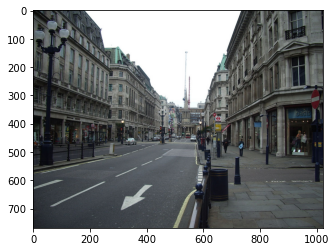

In [40]:
plt.imshow(plt.imread(temp[100]))

shape of x:  (1, 299, 299, 3)
data type:  float32


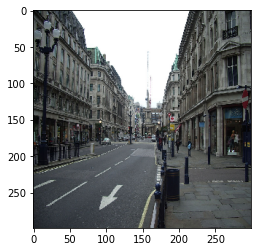

In [41]:
img, x = load_image(temp[100])
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [91]:
import time
tic = time.process_time()

features = []
for i, image_path in enumerate(temp):
    print("analyzing image {}".format(i))
    img, x = load_image(image_path);
    feat = model.predict(x)[0]
    features.append(feat)

analyzing image 0
analyzing image 1
analyzing image 2
analyzing image 3
analyzing image 4
analyzing image 5
analyzing image 6
analyzing image 7
analyzing image 8
analyzing image 9
analyzing image 10
analyzing image 11
analyzing image 12
analyzing image 13
analyzing image 14
analyzing image 15
analyzing image 16
analyzing image 17
analyzing image 18
analyzing image 19
analyzing image 20
analyzing image 21
analyzing image 22
analyzing image 23
analyzing image 24
analyzing image 25
analyzing image 26
analyzing image 27
analyzing image 28
analyzing image 29
analyzing image 30
analyzing image 31
analyzing image 32
analyzing image 33
analyzing image 34
analyzing image 35
analyzing image 36
analyzing image 37
analyzing image 38
analyzing image 39
analyzing image 40
analyzing image 41
analyzing image 42
analyzing image 43
analyzing image 44
analyzing image 45
analyzing image 46
analyzing image 47
analyzing image 48
analyzing image 49
analyzing image 50
analyzing image 51
analyzing image 52
ana

In [92]:
# import numpy as np
# # np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\InceptionF.npy',np.array(features))

In [42]:
features = np.load('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\InceptionF.npy')

In [43]:
features.shape

(5063, 1000)

In [194]:
from sklearn.decomposition import PCA
features = np.array(features)
pca = PCA(n_components=500)
pca.fit(features)
pca_features = pca.transform(features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

In [195]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import plotly.express as px
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

In [44]:
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [45]:
pca_features.shape

(5063, 300)

In [139]:
# import pickle
# filename = 'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\pcaInception_300'
# pickle.dump(pca, open(filename, 'wb'))

In [176]:
# print(temp[5000])
# print(findClass(temp[query_image_idx]))


# for ind in (idx_closest):
#     print(temp[ind])
#     print(findClass(idx))

1285
C:\Users\Prabal\Desktop\IR Project\Image_data\cornmarket_000117.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\pitt_rivers_000055.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\worcester_000074.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\oxford_002275.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\oxford_002570.jpg
C:\Users\Prabal\Desktop\IR Project\Image_data\oxford_000638.jpg
Total time : 0.5573547999993025 seconds
Accuracy is 0.0


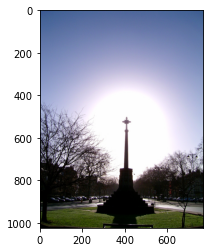

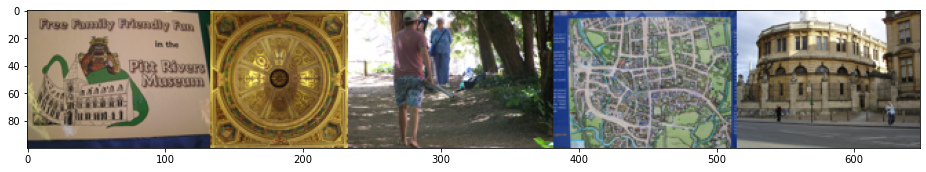

In [261]:
import random
# grab a random query image
query_image_idx = int(5000 * random.random())
print(query_image_idx)
class_q = findClass(query_image_idx)
class_r = list()
# let's display the image
img = image.load_img(temp[query_image_idx])

start = time.perf_counter()
plt.imshow(img)
from scipy.spatial import distance
similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[5:10]
thumbs = []
for idx in idx_closest:
    img = image.load_img(temp[idx])
    class_r.append(findClass(idx))
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

end = time.perf_counter()    
# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

print(temp[query_image_idx])
for i in idx_closest:
    print(temp[i])
print('Total time : {} seconds'.format(end-start))
print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))

In [46]:
#Testing Time :
from scipy.spatial import distance
from tqdm import tqdm
def evaluation(n_samples):
    acc_avg = 0
    time_avg = 0
    for i in tqdm(range(n_samples)):
        print(i)
        query_image_idx = int(300 * random.random())
        class_q = findClass(query_image_idx)
        class_r = list()
        start = time.perf_counter()
        similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
        idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
        thumbs = []
        for idx in idx_closest:
            img = image.load_img(temp2[idx])
            print(idx)
            class_r.append(findClass(idx))
            img = img.resize((int(img.width * 100 / img.height), 100))
            thumbs.append(img)
        end = time.perf_counter()
#         print('Total time : {} seconds'.format(end-start))
#         print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))
        acc_avg = acc_avg + getAccuracy(class_q, class_r)
        time_avg = (end-start)+time_avg
    print('Final accuracy on {} random samples on InceptionV3 (Oxford) {}'.format(n_samples, acc_avg/n_samples))
    print('Average time per sample {}'.format(time_avg/n_samples))
evaluation(1000)

In [ ]:
#Final Result Code

In [47]:
#Testing Time :
from scipy.spatial import distance
from tqdm import tqdm
def evaluation__(sample_index):
    acc_avg = 0
    time_avg = 0
    query_image_idx = sample_index
    class_q = findClass(query_image_idx)
    class_r = list()
    start = time.perf_counter()
    similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
    thumbs = []
    for idx in idx_closest:
        img = image.load_img(temp[idx])
        class_r.append(findClass(idx))
        img = img.resize((int(img.width * 100 / img.height), 100))
        thumbs.append(img)
    end = time.perf_counter()
    acc_avg = acc_avg + getAccuracy(class_q, class_r)
    time_avg = (end-start)+time_avg
    return (time_avg, acc_avg)

import time
j =0
class_acc  =[]
for class_ in my_dict.keys():
    name = class_
    print(name)
    count =0
    temp_list = list()
    for i in range(j,len(temp)):
        j = j+1
        if(temp[i].split('\\')[-1].split('_')[0] == name):
            if count>4:
                break
            temp_list.append((class_,evaluation__(i)))
            count = count +1
    class_acc.append(temp_list)
    print('Reached index: {}'.format(j))   

import pandas as pd
temp_ = list()
for every_class in class_acc:
    a =0
    t =0
    temp2_ = list()
    n = every_class[0][0]
    for i in every_class:
        t = t+i[1][0]
        a = a+i[1][1]
    
    temp2_.append(n)
    temp2_.append(a/5)
    temp2_.append(t/5)
    temp_.append(temp2_)

result_Inceptionv3 = pd.DataFrame(temp_)
result_Inceptionv3.columns = ['Class', 'Accuracy', 'Time']
result_Inceptionv3

all
Reached index: 6
ashmolean
Reached index: 138
balliol
Reached index: 333
bodleian
Reached index: 487
christ
Reached index: 701
cornmarket
Reached index: 1244
hertford
Reached index: 1303
jesus
Reached index: 1370
keble
Reached index: 1531
magdalen
Reached index: 1652
new
Reached index: 2337
oriel
Reached index: 2795
oxford
Reached index: 2890
pitt
Reached index: 4392
radcliffe
Reached index: 4500
trinity
Reached index: 4782
worcester
Reached index: 4999


Class  Accuracy      Time
0          all      80.0  0.404094
1    ashmolean      20.0  0.403660
2      balliol       0.0  0.397884
3     bodleian       8.0  0.395624
4       christ       8.0  0.394459
5   cornmarket       4.0  0.386168
6     hertford       4.0  0.406105
7        jesus       4.0  0.409237
8        keble       0.0  0.391000
9     magdalen       4.0  0.391242
10         new       0.0  0.399522
11       oriel       0.0  0.392986
12      oxford      12.0  0.405204
13        pitt       4.0  0.415007
14   radcliffe       0.0  0.391311
15     trinity       8.0  0.392466
16   worcester       0.0  0.420208

In [ ]:
#ResNet

In [48]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50

model = keras.applications.ResNet50(weights='imagenet', include_top=True)

feat_extractor = model
# feat_extractor.summary()

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.resnet50 import preprocess_input

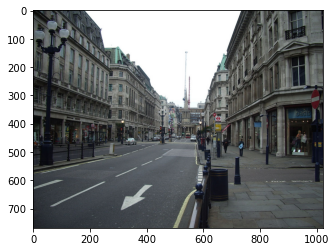

In [50]:
plt.imshow(plt.imread(temp[100]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape of x:  (768, 1024, 3)
data type:  float32


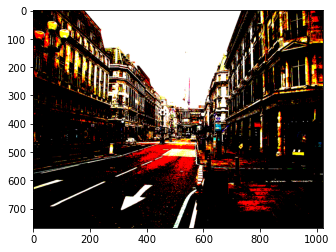

In [51]:
x = preprocess_input(plt.imread(temp[100]))
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(x)

In [157]:
# import time
# import cv2
# tic = time.process_time()

# features = []
# for i, image_path in enumerate(temp):
#     if i % 10 == 0:
#         print("analyzing image {}".format(i))
#     orig = cv2.imread(image_path)
#     orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(orig, (224, 224)).reshape(-1, 224, 224, 3)
#     image = preprocess_input(image)
#     feat = model.predict(image)[0]
#     features.append(feat)

analyzing image 0
analyzing image 10
analyzing image 20
analyzing image 30
analyzing image 40
analyzing image 50
analyzing image 60
analyzing image 70
analyzing image 80
analyzing image 90
analyzing image 100
analyzing image 110
analyzing image 120
analyzing image 130
analyzing image 140
analyzing image 150
analyzing image 160
analyzing image 170
analyzing image 180
analyzing image 190
analyzing image 200
analyzing image 210
analyzing image 220
analyzing image 230
analyzing image 240
analyzing image 250
analyzing image 260
analyzing image 270
analyzing image 280
analyzing image 290
analyzing image 300
analyzing image 310
analyzing image 320
analyzing image 330
analyzing image 340
analyzing image 350
analyzing image 360
analyzing image 370
analyzing image 380
analyzing image 390
analyzing image 400
analyzing image 410
analyzing image 420
analyzing image 430
analyzing image 440
analyzing image 450
analyzing image 460
analyzing image 470
analyzing image 480
analyzing image 490
analyzing i

In [268]:
len(features[0])

1000

In [271]:
from sklearn.decomposition import PCA
features = np.array(features)
pca = PCA(n_components=1000)
pca.fit(features)
pca_features = pca.transform(features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import plotly.express as px
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

In [54]:
import numpy as np
features = np.load('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\ResNetF.npy')
# np.save('C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\ResnetPCAF.npy',np.array(pca_features))

In [55]:
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [161]:
# import pickle
# filename = 'C:\\Users\\Prabal\\Desktop\\Report\\Images\\Oxford\\Features\\pcaResNet_300'
# pickle.dump(pca, open(filename, 'wb'))

In [273]:
type(pca_features)

numpy.ndarray

In [1]:
import random
# grab a random query image
query_image_idx = int(5000 * random.random())
class_q = findClass(query_image_idx)
class_r = list()
# let's display the image
img = image.load_img(temp[query_image_idx])

start = time.perf_counter()

from scipy.spatial import distance
similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
thumbs = []
for idx in idx_closest:
    img = image.load_img(temp[idx])
    class_r.append(findClass(idx))
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

plt.imshow(img)
end = time.perf_counter()    
# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)
print('Total time : {} seconds'.format(end-start))
print('Accuracy is {}'.format(getAccuracy(class_q, class_r)))

In [293]:
#Testing Time :
from scipy.spatial import distance
from tqdm import tqdm
def evaluation(n_samples):
    acc_avg = 0
    time_avg = 0
    t = 0
    for i in tqdm(range(n_samples)):
        print(i)
        query_image_idx = int(300 * random.random())
        class_q = findClass(query_image_idx)
        class_r = list()
        start = time.perf_counter()
        similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
        idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
        thumbs = []
        for idx in idx_closest:
            img = image.load_img(temp[idx])
            class_r.append(findClass(idx))
            img = img.resize((int(img.width * 100 / img.height), 100))
            thumbs.append(img)
        end = time.perf_counter()
        acc_avg = acc_avg + getAccuracy(class_q, class_r)
        time_avg = (end-start)+time_avg
    print('Final accuracy on {} random samples on InceptionV3 (Oxford) {}'.format(n_samples, acc_avg/1000))
    print('Average time per sample {}'.format(time_avg/n_samples))
evaluation(1000)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

0


  0%|                                                                                 | 1/1000 [00:00<06:41,  2.49it/s]

1


  0%|▏                                                                                | 2/1000 [00:00<06:46,  2.45it/s]

2


  0%|▏                                                                                | 3/1000 [00:01<06:48,  2.44it/s]

3


  0%|▎                                                                                | 4/1000 [00:01<06:47,  2.44it/s]

4


  0%|▍                                                                                | 5/1000 [00:02<06:49,  2.43it/s]

5


  1%|▍                                                                                | 6/1000 [00:02<06:51,  2.41it/s]

6


  1%|▌                                                                                | 7/1000 [00:02<06:51,  2.41it/s]

7


  1%|▋                                                                                | 8/1000 [00:03<06:50,  2.42it/s]

8


  1%|▋                                                                                | 9/1000 [00:03<06:47,  2.43it/s]

9


  1%|▊                                                                               | 10/1000 [00:04<06:36,  2.49it/s]

10


  1%|▉                                                                               | 11/1000 [00:04<06:39,  2.48it/s]

11


  1%|▉                                                                               | 12/1000 [00:04<06:43,  2.45it/s]

12


  1%|█                                                                               | 13/1000 [00:05<06:45,  2.43it/s]

13


  1%|█                                                                               | 14/1000 [00:05<06:44,  2.44it/s]

14


  2%|█▏                                                                              | 15/1000 [00:06<06:42,  2.45it/s]

15


  2%|█▎                                                                              | 16/1000 [00:06<06:40,  2.46it/s]

16


  2%|█▎                                                                              | 17/1000 [00:06<06:41,  2.45it/s]

17


  2%|█▍                                                                              | 18/1000 [00:07<06:40,  2.45it/s]

18


  2%|█▌                                                                              | 19/1000 [00:07<06:39,  2.45it/s]

19


  2%|█▌                                                                              | 20/1000 [00:08<06:39,  2.45it/s]

20


  2%|█▋                                                                              | 21/1000 [00:08<06:37,  2.46it/s]

21


  2%|█▊                                                                              | 22/1000 [00:09<06:39,  2.45it/s]

22


  2%|█▊                                                                              | 23/1000 [00:09<06:38,  2.45it/s]

23


  2%|█▉                                                                              | 24/1000 [00:09<06:45,  2.41it/s]

24


  2%|██                                                                              | 25/1000 [00:10<06:52,  2.37it/s]

25


  3%|██                                                                              | 26/1000 [00:10<06:49,  2.38it/s]

26


  3%|██▏                                                                             | 27/1000 [00:11<06:43,  2.41it/s]

27


  3%|██▏                                                                             | 28/1000 [00:11<06:45,  2.40it/s]

28


  3%|██▎                                                                             | 29/1000 [00:11<06:38,  2.44it/s]

29


  3%|██▍                                                                             | 30/1000 [00:12<06:37,  2.44it/s]

30


  3%|██▍                                                                             | 31/1000 [00:12<06:36,  2.44it/s]

31


  3%|██▌                                                                             | 32/1000 [00:13<06:31,  2.47it/s]

32


  3%|██▋                                                                             | 33/1000 [00:13<06:27,  2.49it/s]

33


  3%|██▋                                                                             | 34/1000 [00:13<06:29,  2.48it/s]

34


  4%|██▊                                                                             | 35/1000 [00:14<06:30,  2.47it/s]

35


  4%|██▉                                                                             | 36/1000 [00:14<06:35,  2.44it/s]

36


  4%|██▉                                                                             | 37/1000 [00:15<06:28,  2.48it/s]

37


  4%|███                                                                             | 38/1000 [00:15<06:28,  2.48it/s]

38


  4%|███                                                                             | 39/1000 [00:15<06:28,  2.47it/s]

39


  4%|███▏                                                                            | 40/1000 [00:16<06:29,  2.47it/s]

40


  4%|███▎                                                                            | 41/1000 [00:16<06:25,  2.49it/s]

41


  4%|███▎                                                                            | 42/1000 [00:17<06:23,  2.50it/s]

42


  4%|███▍                                                                            | 43/1000 [00:17<06:25,  2.48it/s]

43


  4%|███▌                                                                            | 44/1000 [00:17<06:19,  2.52it/s]

44


  4%|███▌                                                                            | 45/1000 [00:18<06:19,  2.52it/s]

45


  5%|███▋                                                                            | 46/1000 [00:18<06:24,  2.48it/s]

46


  5%|███▊                                                                            | 47/1000 [00:19<06:21,  2.50it/s]

47


  5%|███▊                                                                            | 48/1000 [00:19<06:23,  2.49it/s]

48


  5%|███▉                                                                            | 49/1000 [00:19<06:24,  2.47it/s]

49


  5%|████                                                                            | 50/1000 [00:20<06:23,  2.48it/s]

50


  5%|████                                                                            | 51/1000 [00:20<06:25,  2.46it/s]

51


  5%|████▏                                                                           | 52/1000 [00:21<06:25,  2.46it/s]

52


  5%|████▏                                                                           | 53/1000 [00:21<06:24,  2.46it/s]

53


  5%|████▎                                                                           | 54/1000 [00:22<06:24,  2.46it/s]

54


  6%|████▍                                                                           | 55/1000 [00:22<06:20,  2.48it/s]

55


  6%|████▍                                                                           | 56/1000 [00:22<06:25,  2.45it/s]

56


  6%|████▌                                                                           | 57/1000 [00:23<06:23,  2.46it/s]

57


  6%|████▋                                                                           | 58/1000 [00:23<06:21,  2.47it/s]

58


  6%|████▋                                                                           | 59/1000 [00:24<06:17,  2.49it/s]

59


  6%|████▊                                                                           | 60/1000 [00:24<06:14,  2.51it/s]

60


  6%|████▉                                                                           | 61/1000 [00:24<06:16,  2.49it/s]

61


  6%|████▉                                                                           | 62/1000 [00:25<06:13,  2.51it/s]

62


  6%|█████                                                                           | 63/1000 [00:25<06:20,  2.47it/s]

63


  6%|█████                                                                           | 64/1000 [00:26<06:20,  2.46it/s]

64


  6%|█████▏                                                                          | 65/1000 [00:26<06:20,  2.46it/s]

65


  7%|█████▎                                                                          | 66/1000 [00:26<06:18,  2.47it/s]

66


  7%|█████▎                                                                          | 67/1000 [00:27<06:17,  2.47it/s]

67


  7%|█████▍                                                                          | 68/1000 [00:27<06:12,  2.51it/s]

68


  7%|█████▌                                                                          | 69/1000 [00:28<06:15,  2.48it/s]

69


  7%|█████▌                                                                          | 70/1000 [00:28<06:14,  2.48it/s]

70


  7%|█████▋                                                                          | 71/1000 [00:28<06:06,  2.53it/s]

71


  7%|█████▊                                                                          | 72/1000 [00:29<06:09,  2.51it/s]

72


  7%|█████▊                                                                          | 73/1000 [00:29<06:07,  2.52it/s]

73


  7%|█████▉                                                                          | 74/1000 [00:30<06:10,  2.50it/s]

74


  8%|██████                                                                          | 75/1000 [00:30<06:08,  2.51it/s]

75


  8%|██████                                                                          | 76/1000 [00:30<06:05,  2.53it/s]

76


  8%|██████▏                                                                         | 77/1000 [00:31<06:13,  2.47it/s]

77


  8%|██████▏                                                                         | 78/1000 [00:31<06:13,  2.47it/s]

78


  8%|██████▎                                                                         | 79/1000 [00:32<06:13,  2.46it/s]

79


  8%|██████▍                                                                         | 80/1000 [00:32<06:09,  2.49it/s]

80


  8%|██████▍                                                                         | 81/1000 [00:32<06:15,  2.45it/s]

81


  8%|██████▌                                                                         | 82/1000 [00:33<06:13,  2.46it/s]

82


  8%|██████▋                                                                         | 83/1000 [00:33<06:13,  2.46it/s]

83


  8%|██████▋                                                                         | 84/1000 [00:34<06:08,  2.48it/s]

84


  8%|██████▊                                                                         | 85/1000 [00:34<06:09,  2.47it/s]

85


  9%|██████▉                                                                         | 86/1000 [00:34<06:06,  2.49it/s]

86


  9%|██████▉                                                                         | 87/1000 [00:35<06:03,  2.51it/s]

87


  9%|███████                                                                         | 88/1000 [00:35<06:05,  2.49it/s]

88


  9%|███████                                                                         | 89/1000 [00:36<06:07,  2.48it/s]

89


  9%|███████▏                                                                        | 90/1000 [00:36<06:12,  2.44it/s]

90


  9%|███████▎                                                                        | 91/1000 [00:36<06:09,  2.46it/s]

91


  9%|███████▎                                                                        | 92/1000 [00:37<06:06,  2.48it/s]

92


  9%|███████▍                                                                        | 93/1000 [00:37<06:04,  2.49it/s]

93


  9%|███████▌                                                                        | 94/1000 [00:38<05:59,  2.52it/s]

94


 10%|███████▌                                                                        | 95/1000 [00:38<05:57,  2.53it/s]

95


 10%|███████▋                                                                        | 96/1000 [00:38<06:00,  2.51it/s]

96


 10%|███████▊                                                                        | 97/1000 [00:39<06:00,  2.50it/s]

97


 10%|███████▊                                                                        | 98/1000 [00:39<05:59,  2.51it/s]

98


 10%|███████▉                                                                        | 99/1000 [00:40<06:01,  2.49it/s]

99


 10%|███████▉                                                                       | 100/1000 [00:40<06:02,  2.48it/s]

100


 10%|███████▉                                                                       | 101/1000 [00:40<06:06,  2.45it/s]

101


 10%|████████                                                                       | 102/1000 [00:41<06:06,  2.45it/s]

102


 10%|████████▏                                                                      | 103/1000 [00:41<06:05,  2.45it/s]

103


 10%|████████▏                                                                      | 104/1000 [00:42<06:10,  2.42it/s]

104


 10%|████████▎                                                                      | 105/1000 [00:42<06:08,  2.43it/s]

105


 11%|████████▎                                                                      | 106/1000 [00:42<06:03,  2.46it/s]

106


 11%|████████▍                                                                      | 107/1000 [00:43<06:03,  2.46it/s]

107


 11%|████████▌                                                                      | 108/1000 [00:43<05:59,  2.48it/s]

108


 11%|████████▌                                                                      | 109/1000 [00:44<05:55,  2.51it/s]

109


 11%|████████▋                                                                      | 110/1000 [00:44<05:53,  2.52it/s]

110


 11%|████████▊                                                                      | 111/1000 [00:44<05:55,  2.50it/s]

111


 11%|████████▊                                                                      | 112/1000 [00:45<05:56,  2.49it/s]

112


 11%|████████▉                                                                      | 113/1000 [00:45<05:58,  2.47it/s]

113


 11%|█████████                                                                      | 114/1000 [00:46<05:59,  2.47it/s]

114


 12%|█████████                                                                      | 115/1000 [00:46<05:55,  2.49it/s]

115


 12%|█████████▏                                                                     | 116/1000 [00:46<05:56,  2.48it/s]

116


 12%|█████████▏                                                                     | 117/1000 [00:47<06:05,  2.42it/s]

117


 12%|█████████▎                                                                     | 118/1000 [00:47<06:07,  2.40it/s]

118


 12%|█████████▍                                                                     | 119/1000 [00:48<05:59,  2.45it/s]

119


 12%|█████████▍                                                                     | 120/1000 [00:48<06:03,  2.42it/s]

120


 12%|█████████▌                                                                     | 121/1000 [00:49<06:01,  2.43it/s]

121


 12%|█████████▋                                                                     | 122/1000 [00:49<06:00,  2.44it/s]

122


 12%|█████████▋                                                                     | 123/1000 [00:49<05:59,  2.44it/s]

123


 12%|█████████▊                                                                     | 124/1000 [00:50<05:58,  2.44it/s]

124


 12%|█████████▉                                                                     | 125/1000 [00:50<05:53,  2.47it/s]

125


 13%|█████████▉                                                                     | 126/1000 [00:51<05:54,  2.46it/s]

126


 13%|██████████                                                                     | 127/1000 [00:51<05:54,  2.46it/s]

127


 13%|██████████                                                                     | 128/1000 [00:51<05:54,  2.46it/s]

128


 13%|██████████▏                                                                    | 129/1000 [00:52<05:58,  2.43it/s]

129


 13%|██████████▎                                                                    | 130/1000 [00:52<05:57,  2.44it/s]

130


 13%|██████████▎                                                                    | 131/1000 [00:53<05:56,  2.44it/s]

131


 13%|██████████▍                                                                    | 132/1000 [00:53<05:51,  2.47it/s]

132


 13%|██████████▌                                                                    | 133/1000 [00:53<05:55,  2.44it/s]

133


 13%|██████████▌                                                                    | 134/1000 [00:54<05:57,  2.42it/s]

134


 14%|██████████▋                                                                    | 135/1000 [00:54<06:01,  2.39it/s]

135


 14%|██████████▋                                                                    | 136/1000 [00:55<05:57,  2.41it/s]

136


 14%|██████████▊                                                                    | 137/1000 [00:55<05:52,  2.45it/s]

137


 14%|██████████▉                                                                    | 138/1000 [00:56<05:51,  2.45it/s]

138


 14%|██████████▉                                                                    | 139/1000 [00:56<05:51,  2.45it/s]

139


 14%|███████████                                                                    | 140/1000 [00:56<05:52,  2.44it/s]

140


 14%|███████████▏                                                                   | 141/1000 [00:57<05:49,  2.46it/s]

141


 14%|███████████▏                                                                   | 142/1000 [00:57<05:53,  2.42it/s]

142


 14%|███████████▎                                                                   | 143/1000 [00:58<05:44,  2.49it/s]

143


 14%|███████████▍                                                                   | 144/1000 [00:58<05:57,  2.40it/s]

144


 14%|███████████▍                                                                   | 145/1000 [00:58<05:54,  2.41it/s]

145


 15%|███████████▌                                                                   | 146/1000 [00:59<05:52,  2.42it/s]

146


 15%|███████████▌                                                                   | 147/1000 [00:59<05:46,  2.46it/s]

147


 15%|███████████▋                                                                   | 148/1000 [01:00<05:46,  2.46it/s]

148


 15%|███████████▊                                                                   | 149/1000 [01:00<05:40,  2.50it/s]

149


 15%|███████████▊                                                                   | 150/1000 [01:00<05:43,  2.47it/s]

150


 15%|███████████▉                                                                   | 151/1000 [01:01<05:44,  2.46it/s]

151


 15%|████████████                                                                   | 152/1000 [01:01<05:45,  2.45it/s]

152


 15%|████████████                                                                   | 153/1000 [01:02<05:41,  2.48it/s]

153


 15%|████████████▏                                                                  | 154/1000 [01:02<05:39,  2.49it/s]

154


 16%|████████████▏                                                                  | 155/1000 [01:02<05:38,  2.49it/s]

155


 16%|████████████▎                                                                  | 156/1000 [01:03<05:40,  2.48it/s]

156


 16%|████████████▍                                                                  | 157/1000 [01:03<05:41,  2.47it/s]

157


 16%|████████████▍                                                                  | 158/1000 [01:04<05:41,  2.46it/s]

158


 16%|████████████▌                                                                  | 159/1000 [01:04<05:41,  2.46it/s]

159


 16%|████████████▋                                                                  | 160/1000 [01:04<05:37,  2.49it/s]

160


 16%|████████████▋                                                                  | 161/1000 [01:05<05:39,  2.47it/s]

161


 16%|████████████▊                                                                  | 162/1000 [01:05<05:39,  2.47it/s]

162


 16%|████████████▉                                                                  | 163/1000 [01:06<05:40,  2.46it/s]

163


 16%|████████████▉                                                                  | 164/1000 [01:06<05:39,  2.46it/s]

164


 16%|█████████████                                                                  | 165/1000 [01:06<05:35,  2.49it/s]

165


 17%|█████████████                                                                  | 166/1000 [01:07<05:40,  2.45it/s]

166


 17%|█████████████▏                                                                 | 167/1000 [01:07<05:40,  2.45it/s]

167


 17%|█████████████▎                                                                 | 168/1000 [01:08<05:39,  2.45it/s]

168


 17%|█████████████▎                                                                 | 169/1000 [01:08<05:38,  2.45it/s]

169


 17%|█████████████▍                                                                 | 170/1000 [01:09<05:42,  2.42it/s]

170


 17%|█████████████▌                                                                 | 171/1000 [01:09<05:32,  2.49it/s]

171


 17%|█████████████▌                                                                 | 172/1000 [01:09<05:34,  2.48it/s]

172


 17%|█████████████▋                                                                 | 173/1000 [01:10<05:33,  2.48it/s]

173


 17%|█████████████▋                                                                 | 174/1000 [01:10<05:33,  2.48it/s]

174


 18%|█████████████▊                                                                 | 175/1000 [01:11<05:35,  2.46it/s]

175


 18%|█████████████▉                                                                 | 176/1000 [01:11<05:35,  2.46it/s]

176


 18%|█████████████▉                                                                 | 177/1000 [01:11<05:33,  2.47it/s]

177


 18%|██████████████                                                                 | 178/1000 [01:12<05:27,  2.51it/s]

178


 18%|██████████████▏                                                                | 179/1000 [01:12<05:33,  2.46it/s]

179


 18%|██████████████▏                                                                | 180/1000 [01:13<05:33,  2.46it/s]

180


 18%|██████████████▎                                                                | 181/1000 [01:13<05:33,  2.46it/s]

181


 18%|██████████████▍                                                                | 182/1000 [01:13<05:36,  2.43it/s]

182


 18%|██████████████▍                                                                | 183/1000 [01:14<05:35,  2.44it/s]

183


 18%|██████████████▌                                                                | 184/1000 [01:14<05:38,  2.41it/s]

184


 18%|██████████████▌                                                                | 185/1000 [01:15<05:40,  2.40it/s]

185


 19%|██████████████▋                                                                | 186/1000 [01:15<05:38,  2.41it/s]

186


 19%|██████████████▊                                                                | 187/1000 [01:15<05:34,  2.43it/s]

187


 19%|██████████████▊                                                                | 188/1000 [01:16<05:32,  2.44it/s]

188


 19%|██████████████▉                                                                | 189/1000 [01:16<05:31,  2.45it/s]

189


 19%|███████████████                                                                | 190/1000 [01:17<05:36,  2.41it/s]

190


 19%|███████████████                                                                | 191/1000 [01:17<05:33,  2.42it/s]

191


 19%|███████████████▏                                                               | 192/1000 [01:18<05:28,  2.46it/s]

192


 19%|███████████████▏                                                               | 193/1000 [01:18<05:27,  2.46it/s]

193


 19%|███████████████▎                                                               | 194/1000 [01:18<05:24,  2.49it/s]

194


 20%|███████████████▍                                                               | 195/1000 [01:19<05:21,  2.50it/s]

195


 20%|███████████████▍                                                               | 196/1000 [01:19<05:22,  2.49it/s]

196


 20%|███████████████▌                                                               | 197/1000 [01:19<05:20,  2.51it/s]

197


 20%|███████████████▋                                                               | 198/1000 [01:20<05:22,  2.49it/s]

198


 20%|███████████████▋                                                               | 199/1000 [01:20<05:22,  2.48it/s]

199


 20%|███████████████▊                                                               | 200/1000 [01:21<05:19,  2.50it/s]

200


 20%|███████████████▉                                                               | 201/1000 [01:21<05:21,  2.49it/s]

201


 20%|███████████████▉                                                               | 202/1000 [01:22<05:24,  2.46it/s]

202


 20%|████████████████                                                               | 203/1000 [01:22<05:22,  2.47it/s]

203


 20%|████████████████                                                               | 204/1000 [01:22<05:23,  2.46it/s]

204


 20%|████████████████▏                                                              | 205/1000 [01:23<05:17,  2.50it/s]

205


 21%|████████████████▎                                                              | 206/1000 [01:23<05:17,  2.50it/s]

206


 21%|████████████████▎                                                              | 207/1000 [01:24<05:17,  2.49it/s]

207


 21%|████████████████▍                                                              | 208/1000 [01:24<05:15,  2.51it/s]

208


 21%|████████████████▌                                                              | 209/1000 [01:24<05:16,  2.50it/s]

209


 21%|████████████████▌                                                              | 210/1000 [01:25<05:15,  2.51it/s]

210


 21%|████████████████▋                                                              | 211/1000 [01:25<05:17,  2.49it/s]

211


 21%|████████████████▋                                                              | 212/1000 [01:26<05:19,  2.46it/s]

212


 21%|████████████████▊                                                              | 213/1000 [01:26<05:21,  2.45it/s]

213


 21%|████████████████▉                                                              | 214/1000 [01:26<05:21,  2.45it/s]

214


 22%|████████████████▉                                                              | 215/1000 [01:27<05:17,  2.47it/s]

215


 22%|█████████████████                                                              | 216/1000 [01:27<05:16,  2.48it/s]

216


 22%|█████████████████▏                                                             | 217/1000 [01:28<05:13,  2.49it/s]

217


 22%|█████████████████▏                                                             | 218/1000 [01:28<05:15,  2.48it/s]

218


 22%|█████████████████▎                                                             | 219/1000 [01:28<05:15,  2.47it/s]

219


 22%|█████████████████▍                                                             | 220/1000 [01:29<05:16,  2.47it/s]

220


 22%|█████████████████▍                                                             | 221/1000 [01:29<05:20,  2.43it/s]

221


 22%|█████████████████▌                                                             | 222/1000 [01:30<05:15,  2.46it/s]

222


 22%|█████████████████▌                                                             | 223/1000 [01:30<05:15,  2.46it/s]

223


 22%|█████████████████▋                                                             | 224/1000 [01:30<05:14,  2.47it/s]

224


 22%|█████████████████▊                                                             | 225/1000 [01:31<05:12,  2.48it/s]

225


 23%|█████████████████▊                                                             | 226/1000 [01:31<05:16,  2.44it/s]

226


 23%|█████████████████▉                                                             | 227/1000 [01:32<05:10,  2.49it/s]

227


 23%|██████████████████                                                             | 228/1000 [01:32<05:15,  2.45it/s]

228


 23%|██████████████████                                                             | 229/1000 [01:32<05:16,  2.44it/s]

229


 23%|██████████████████▏                                                            | 230/1000 [01:33<05:11,  2.47it/s]

230


 23%|██████████████████▏                                                            | 231/1000 [01:33<05:17,  2.42it/s]

231


 23%|██████████████████▎                                                            | 232/1000 [01:34<05:13,  2.45it/s]

232


 23%|██████████████████▍                                                            | 233/1000 [01:34<05:11,  2.46it/s]

233


 23%|██████████████████▍                                                            | 234/1000 [01:34<05:12,  2.45it/s]

234


 24%|██████████████████▌                                                            | 235/1000 [01:35<05:13,  2.44it/s]

235


 24%|██████████████████▋                                                            | 236/1000 [01:35<05:18,  2.40it/s]

236


 24%|██████████████████▋                                                            | 237/1000 [01:36<05:13,  2.43it/s]

237


 24%|██████████████████▊                                                            | 238/1000 [01:36<05:07,  2.48it/s]

238


 24%|██████████████████▉                                                            | 239/1000 [01:37<05:06,  2.49it/s]

239


 24%|██████████████████▉                                                            | 240/1000 [01:37<05:04,  2.50it/s]

240


 24%|███████████████████                                                            | 241/1000 [01:37<05:02,  2.51it/s]

241


 24%|███████████████████                                                            | 242/1000 [01:38<05:07,  2.46it/s]

242


 24%|███████████████████▏                                                           | 243/1000 [01:38<05:08,  2.46it/s]

243


 24%|███████████████████▎                                                           | 244/1000 [01:39<05:11,  2.43it/s]

244


 24%|███████████████████▎                                                           | 245/1000 [01:39<05:06,  2.46it/s]

245


 25%|███████████████████▍                                                           | 246/1000 [01:39<05:04,  2.48it/s]

246


 25%|███████████████████▌                                                           | 247/1000 [01:40<05:02,  2.49it/s]

247


 25%|███████████████████▌                                                           | 248/1000 [01:40<04:56,  2.53it/s]

248


 25%|███████████████████▋                                                           | 249/1000 [01:41<04:55,  2.54it/s]

249


 25%|███████████████████▊                                                           | 250/1000 [01:41<04:55,  2.54it/s]

250


 25%|███████████████████▊                                                           | 251/1000 [01:41<04:58,  2.51it/s]

251


 25%|███████████████████▉                                                           | 252/1000 [01:42<05:00,  2.49it/s]

252


 25%|███████████████████▉                                                           | 253/1000 [01:42<04:54,  2.54it/s]

253


 25%|████████████████████                                                           | 254/1000 [01:43<05:04,  2.45it/s]

254


 26%|████████████████████▏                                                          | 255/1000 [01:43<05:03,  2.45it/s]

255


 26%|████████████████████▏                                                          | 256/1000 [01:43<05:06,  2.42it/s]

256


 26%|████████████████████▎                                                          | 257/1000 [01:44<05:05,  2.43it/s]

257


 26%|████████████████████▍                                                          | 258/1000 [01:44<05:04,  2.44it/s]

258


 26%|████████████████████▍                                                          | 259/1000 [01:45<05:03,  2.44it/s]

259


 26%|████████████████████▌                                                          | 260/1000 [01:45<04:59,  2.47it/s]

260


 26%|████████████████████▌                                                          | 261/1000 [01:45<04:59,  2.47it/s]

261


 26%|████████████████████▋                                                          | 262/1000 [01:46<04:57,  2.48it/s]

262


 26%|████████████████████▊                                                          | 263/1000 [01:46<04:58,  2.47it/s]

263


 26%|████████████████████▊                                                          | 264/1000 [01:47<04:54,  2.50it/s]

264


 26%|████████████████████▉                                                          | 265/1000 [01:47<05:01,  2.44it/s]

265


 27%|█████████████████████                                                          | 266/1000 [01:47<04:59,  2.45it/s]

266


 27%|█████████████████████                                                          | 267/1000 [01:48<05:01,  2.43it/s]

267


 27%|█████████████████████▏                                                         | 268/1000 [01:48<05:03,  2.41it/s]

268


 27%|█████████████████████▎                                                         | 269/1000 [01:49<04:57,  2.45it/s]

269


 27%|█████████████████████▎                                                         | 270/1000 [01:49<05:06,  2.38it/s]

270


 27%|█████████████████████▍                                                         | 271/1000 [01:50<05:04,  2.39it/s]

271


 27%|█████████████████████▍                                                         | 272/1000 [01:50<05:01,  2.41it/s]

272


 27%|█████████████████████▌                                                         | 273/1000 [01:50<04:54,  2.47it/s]

273


 27%|█████████████████████▋                                                         | 274/1000 [01:51<04:50,  2.50it/s]

274


 28%|█████████████████████▋                                                         | 275/1000 [01:51<04:48,  2.52it/s]

275


 28%|█████████████████████▊                                                         | 276/1000 [01:51<04:47,  2.52it/s]

276


 28%|█████████████████████▉                                                         | 277/1000 [01:52<04:49,  2.50it/s]

277


 28%|█████████████████████▉                                                         | 278/1000 [01:52<04:47,  2.51it/s]

278


 28%|██████████████████████                                                         | 279/1000 [01:53<04:46,  2.52it/s]

279


 28%|██████████████████████                                                         | 280/1000 [01:53<04:44,  2.53it/s]

280


 28%|██████████████████████▏                                                        | 281/1000 [01:53<04:46,  2.51it/s]

281


 28%|██████████████████████▎                                                        | 282/1000 [01:54<04:43,  2.53it/s]

282


 28%|██████████████████████▎                                                        | 283/1000 [01:54<04:44,  2.52it/s]

283


 28%|██████████████████████▍                                                        | 284/1000 [01:55<04:42,  2.53it/s]

284


 28%|██████████████████████▌                                                        | 285/1000 [01:55<04:41,  2.54it/s]

285


 29%|██████████████████████▌                                                        | 286/1000 [01:55<04:41,  2.54it/s]

286


 29%|██████████████████████▋                                                        | 287/1000 [01:56<04:43,  2.51it/s]

287


 29%|██████████████████████▊                                                        | 288/1000 [01:56<04:45,  2.49it/s]

288


 29%|██████████████████████▊                                                        | 289/1000 [01:57<04:46,  2.48it/s]

289


 29%|██████████████████████▉                                                        | 290/1000 [01:57<04:47,  2.47it/s]

290


 29%|██████████████████████▉                                                        | 291/1000 [01:57<04:47,  2.46it/s]

291


 29%|███████████████████████                                                        | 292/1000 [01:58<04:49,  2.45it/s]

292


 29%|███████████████████████▏                                                       | 293/1000 [01:58<04:50,  2.44it/s]

293


 29%|███████████████████████▏                                                       | 294/1000 [01:59<04:46,  2.46it/s]

294


 30%|███████████████████████▎                                                       | 295/1000 [01:59<04:52,  2.41it/s]

295


 30%|███████████████████████▍                                                       | 296/1000 [02:00<04:48,  2.44it/s]

296


 30%|███████████████████████▍                                                       | 297/1000 [02:00<04:49,  2.43it/s]

297


 30%|███████████████████████▌                                                       | 298/1000 [02:00<04:49,  2.43it/s]

298


 30%|███████████████████████▌                                                       | 299/1000 [02:01<04:50,  2.41it/s]

299


 30%|███████████████████████▋                                                       | 300/1000 [02:01<04:47,  2.43it/s]

300


 30%|███████████████████████▊                                                       | 301/1000 [02:02<04:44,  2.45it/s]

301


 30%|███████████████████████▊                                                       | 302/1000 [02:02<04:42,  2.47it/s]

302


 30%|███████████████████████▉                                                       | 303/1000 [02:02<04:43,  2.46it/s]

303


 30%|████████████████████████                                                       | 304/1000 [02:03<04:42,  2.47it/s]

304


 30%|████████████████████████                                                       | 305/1000 [02:03<04:45,  2.44it/s]

305


 31%|████████████████████████▏                                                      | 306/1000 [02:04<04:46,  2.43it/s]

306


 31%|████████████████████████▎                                                      | 307/1000 [02:04<04:39,  2.48it/s]

307


 31%|████████████████████████▎                                                      | 308/1000 [02:04<04:41,  2.45it/s]

308


 31%|████████████████████████▍                                                      | 309/1000 [02:05<04:43,  2.44it/s]

309


 31%|████████████████████████▍                                                      | 310/1000 [02:05<04:43,  2.43it/s]

310


 31%|████████████████████████▌                                                      | 311/1000 [02:06<04:41,  2.45it/s]

311


 31%|████████████████████████▋                                                      | 312/1000 [02:06<04:41,  2.45it/s]

312


 31%|████████████████████████▋                                                      | 313/1000 [02:07<04:41,  2.44it/s]

313


 31%|████████████████████████▊                                                      | 314/1000 [02:07<04:40,  2.44it/s]

314


 32%|████████████████████████▉                                                      | 315/1000 [02:07<04:38,  2.46it/s]

315


 32%|████████████████████████▉                                                      | 316/1000 [02:08<04:32,  2.51it/s]

316


 32%|█████████████████████████                                                      | 317/1000 [02:08<04:36,  2.47it/s]

317


 32%|█████████████████████████                                                      | 318/1000 [02:09<04:34,  2.48it/s]

318


 32%|█████████████████████████▏                                                     | 319/1000 [02:09<04:34,  2.48it/s]

319


 32%|█████████████████████████▎                                                     | 320/1000 [02:09<04:35,  2.47it/s]

320


 32%|█████████████████████████▎                                                     | 321/1000 [02:10<04:35,  2.46it/s]

321


 32%|█████████████████████████▍                                                     | 322/1000 [02:10<04:38,  2.43it/s]

322


 32%|█████████████████████████▌                                                     | 323/1000 [02:11<04:37,  2.44it/s]

323


 32%|█████████████████████████▌                                                     | 324/1000 [02:11<04:33,  2.47it/s]

324


 32%|█████████████████████████▋                                                     | 325/1000 [02:11<04:31,  2.48it/s]

325


 33%|█████████████████████████▊                                                     | 326/1000 [02:12<04:31,  2.48it/s]

326


 33%|█████████████████████████▊                                                     | 327/1000 [02:12<04:35,  2.44it/s]

327


 33%|█████████████████████████▉                                                     | 328/1000 [02:13<04:34,  2.45it/s]

328


 33%|█████████████████████████▉                                                     | 329/1000 [02:13<04:34,  2.45it/s]

329


 33%|██████████████████████████                                                     | 330/1000 [02:13<04:39,  2.39it/s]

330


 33%|██████████████████████████▏                                                    | 331/1000 [02:14<04:36,  2.42it/s]

331


 33%|██████████████████████████▏                                                    | 332/1000 [02:14<04:35,  2.42it/s]

332


 33%|██████████████████████████▎                                                    | 333/1000 [02:15<04:32,  2.45it/s]

333


 33%|██████████████████████████▍                                                    | 334/1000 [02:15<04:30,  2.46it/s]

334


 34%|██████████████████████████▍                                                    | 335/1000 [02:15<04:30,  2.46it/s]

335


 34%|██████████████████████████▌                                                    | 336/1000 [02:16<04:32,  2.43it/s]

336


 34%|██████████████████████████▌                                                    | 337/1000 [02:16<04:35,  2.41it/s]

337


 34%|██████████████████████████▋                                                    | 338/1000 [02:17<04:30,  2.45it/s]

338


 34%|██████████████████████████▊                                                    | 339/1000 [02:17<04:29,  2.46it/s]

339


 34%|██████████████████████████▊                                                    | 340/1000 [02:18<04:27,  2.46it/s]

340


 34%|██████████████████████████▉                                                    | 341/1000 [02:18<04:25,  2.48it/s]

341


 34%|███████████████████████████                                                    | 342/1000 [02:18<04:25,  2.48it/s]

342


 34%|███████████████████████████                                                    | 343/1000 [02:19<04:24,  2.48it/s]

343


 34%|███████████████████████████▏                                                   | 344/1000 [02:19<04:24,  2.48it/s]

344


 34%|███████████████████████████▎                                                   | 345/1000 [02:20<04:26,  2.46it/s]

345


 35%|███████████████████████████▎                                                   | 346/1000 [02:20<04:27,  2.44it/s]

346


 35%|███████████████████████████▍                                                   | 347/1000 [02:20<04:25,  2.46it/s]

347


 35%|███████████████████████████▍                                                   | 348/1000 [02:21<04:25,  2.46it/s]

348


 35%|███████████████████████████▌                                                   | 349/1000 [02:21<04:24,  2.46it/s]

349


 35%|███████████████████████████▋                                                   | 350/1000 [02:22<04:24,  2.46it/s]

350


 35%|███████████████████████████▋                                                   | 351/1000 [02:22<04:23,  2.47it/s]

351


 35%|███████████████████████████▊                                                   | 352/1000 [02:22<04:24,  2.45it/s]

352


 35%|███████████████████████████▉                                                   | 353/1000 [02:23<04:24,  2.44it/s]

353


 35%|███████████████████████████▉                                                   | 354/1000 [02:23<04:23,  2.45it/s]

354


 36%|████████████████████████████                                                   | 355/1000 [02:24<04:22,  2.46it/s]

355


 36%|████████████████████████████                                                   | 356/1000 [02:24<04:20,  2.48it/s]

356


 36%|████████████████████████████▏                                                  | 357/1000 [02:24<04:20,  2.47it/s]

357


 36%|████████████████████████████▎                                                  | 358/1000 [02:25<04:20,  2.46it/s]

358


 36%|████████████████████████████▎                                                  | 359/1000 [02:25<04:17,  2.49it/s]

359


 36%|████████████████████████████▍                                                  | 360/1000 [02:26<04:24,  2.42it/s]

360


 36%|████████████████████████████▌                                                  | 361/1000 [02:26<04:23,  2.43it/s]

361


 36%|████████████████████████████▌                                                  | 362/1000 [02:26<04:19,  2.46it/s]

362


 36%|████████████████████████████▋                                                  | 363/1000 [02:27<04:22,  2.43it/s]

363


 36%|████████████████████████████▊                                                  | 364/1000 [02:27<04:21,  2.44it/s]

364


 36%|████████████████████████████▊                                                  | 365/1000 [02:28<04:19,  2.44it/s]

365


 37%|████████████████████████████▉                                                  | 366/1000 [02:28<04:25,  2.39it/s]

366


 37%|████████████████████████████▉                                                  | 367/1000 [02:29<04:22,  2.41it/s]

367


 37%|█████████████████████████████                                                  | 368/1000 [02:29<04:18,  2.45it/s]

368


 37%|█████████████████████████████▏                                                 | 369/1000 [02:29<04:16,  2.46it/s]

369


 37%|█████████████████████████████▏                                                 | 370/1000 [02:30<04:14,  2.48it/s]

370


 37%|█████████████████████████████▎                                                 | 371/1000 [02:30<04:16,  2.46it/s]

371


 37%|█████████████████████████████▍                                                 | 372/1000 [02:31<04:13,  2.47it/s]

372


 37%|█████████████████████████████▍                                                 | 373/1000 [02:31<04:12,  2.48it/s]

373


 37%|█████████████████████████████▌                                                 | 374/1000 [02:31<04:12,  2.48it/s]

374


 38%|█████████████████████████████▋                                                 | 375/1000 [02:32<04:10,  2.50it/s]

375


 38%|█████████████████████████████▋                                                 | 376/1000 [02:32<04:13,  2.46it/s]

376


 38%|█████████████████████████████▊                                                 | 377/1000 [02:33<04:16,  2.43it/s]

377


 38%|█████████████████████████████▊                                                 | 378/1000 [02:33<04:11,  2.47it/s]

378


 38%|█████████████████████████████▉                                                 | 379/1000 [02:33<04:10,  2.48it/s]

379


 38%|██████████████████████████████                                                 | 380/1000 [02:34<04:12,  2.45it/s]

380


 38%|██████████████████████████████                                                 | 381/1000 [02:34<04:11,  2.46it/s]

381


 38%|██████████████████████████████▏                                                | 382/1000 [02:35<04:10,  2.46it/s]

382


 38%|██████████████████████████████▎                                                | 383/1000 [02:35<04:11,  2.45it/s]

383


 38%|██████████████████████████████▎                                                | 384/1000 [02:35<04:10,  2.45it/s]

384


 38%|██████████████████████████████▍                                                | 385/1000 [02:36<04:10,  2.45it/s]

385


 39%|██████████████████████████████▍                                                | 386/1000 [02:36<04:13,  2.43it/s]

386


 39%|██████████████████████████████▌                                                | 387/1000 [02:37<04:10,  2.45it/s]

387


 39%|██████████████████████████████▋                                                | 388/1000 [02:37<04:09,  2.46it/s]

388


 39%|██████████████████████████████▋                                                | 389/1000 [02:37<04:09,  2.45it/s]

389


 39%|██████████████████████████████▊                                                | 390/1000 [02:38<04:12,  2.42it/s]

390


 39%|██████████████████████████████▉                                                | 391/1000 [02:38<04:10,  2.43it/s]

391


 39%|██████████████████████████████▉                                                | 392/1000 [02:39<04:08,  2.44it/s]

392


 39%|███████████████████████████████                                                | 393/1000 [02:39<04:05,  2.47it/s]

393


 39%|███████████████████████████████▏                                               | 394/1000 [02:40<04:11,  2.41it/s]

394


 40%|███████████████████████████████▏                                               | 395/1000 [02:40<04:09,  2.42it/s]

395


 40%|███████████████████████████████▎                                               | 396/1000 [02:40<04:08,  2.43it/s]

396


 40%|███████████████████████████████▎                                               | 397/1000 [02:41<04:10,  2.41it/s]

397


 40%|███████████████████████████████▍                                               | 398/1000 [02:41<04:08,  2.43it/s]

398


 40%|███████████████████████████████▌                                               | 399/1000 [02:42<04:10,  2.40it/s]

399


 40%|███████████████████████████████▌                                               | 400/1000 [02:42<04:07,  2.43it/s]

400


 40%|███████████████████████████████▋                                               | 401/1000 [02:42<04:03,  2.46it/s]

401


 40%|███████████████████████████████▊                                               | 402/1000 [02:43<04:01,  2.48it/s]

402


 40%|███████████████████████████████▊                                               | 403/1000 [02:43<04:00,  2.48it/s]

403


 40%|███████████████████████████████▉                                               | 404/1000 [02:44<04:00,  2.48it/s]

404


 40%|███████████████████████████████▉                                               | 405/1000 [02:44<04:00,  2.47it/s]

405


 41%|████████████████████████████████                                               | 406/1000 [02:44<04:06,  2.41it/s]

406


 41%|████████████████████████████████▏                                              | 407/1000 [02:45<04:03,  2.43it/s]

407


 41%|████████████████████████████████▏                                              | 408/1000 [02:45<04:03,  2.43it/s]

408


 41%|████████████████████████████████▎                                              | 409/1000 [02:46<04:02,  2.43it/s]

409


 41%|████████████████████████████████▍                                              | 410/1000 [02:46<03:59,  2.46it/s]

410


 41%|████████████████████████████████▍                                              | 411/1000 [02:46<03:59,  2.46it/s]

411


 41%|████████████████████████████████▌                                              | 412/1000 [02:47<03:58,  2.46it/s]

412


 41%|████████████████████████████████▋                                              | 413/1000 [02:47<03:56,  2.48it/s]

413


 41%|████████████████████████████████▋                                              | 414/1000 [02:48<03:52,  2.52it/s]

414


 42%|████████████████████████████████▊                                              | 415/1000 [02:48<03:51,  2.53it/s]

415


 42%|████████████████████████████████▊                                              | 416/1000 [02:48<03:53,  2.50it/s]

416


 42%|████████████████████████████████▉                                              | 417/1000 [02:49<03:54,  2.49it/s]

417


 42%|█████████████████████████████████                                              | 418/1000 [02:49<03:59,  2.43it/s]

418


 42%|█████████████████████████████████                                              | 419/1000 [02:50<04:00,  2.42it/s]

419


 42%|█████████████████████████████████▏                                             | 420/1000 [02:50<04:01,  2.40it/s]

420


 42%|█████████████████████████████████▎                                             | 421/1000 [02:51<04:00,  2.41it/s]

421


 42%|█████████████████████████████████▎                                             | 422/1000 [02:51<04:03,  2.37it/s]

422


 42%|█████████████████████████████████▍                                             | 423/1000 [02:51<04:01,  2.39it/s]

423


 42%|█████████████████████████████████▍                                             | 424/1000 [02:52<03:59,  2.40it/s]

424


 42%|█████████████████████████████████▌                                             | 425/1000 [02:52<03:57,  2.42it/s]

425


 43%|█████████████████████████████████▋                                             | 426/1000 [02:53<03:55,  2.43it/s]

426


 43%|█████████████████████████████████▋                                             | 427/1000 [02:53<03:56,  2.42it/s]

427


 43%|█████████████████████████████████▊                                             | 428/1000 [02:53<03:54,  2.44it/s]

428


 43%|█████████████████████████████████▉                                             | 429/1000 [02:54<03:51,  2.46it/s]

429


 43%|█████████████████████████████████▉                                             | 430/1000 [02:54<03:51,  2.46it/s]

430


 43%|██████████████████████████████████                                             | 431/1000 [02:55<03:51,  2.45it/s]

431


 43%|██████████████████████████████████▏                                            | 432/1000 [02:55<03:51,  2.45it/s]

432


 43%|██████████████████████████████████▏                                            | 433/1000 [02:55<03:53,  2.43it/s]

433


 43%|██████████████████████████████████▎                                            | 434/1000 [02:56<03:50,  2.46it/s]

434


 44%|██████████████████████████████████▎                                            | 435/1000 [02:56<03:50,  2.45it/s]

435


 44%|██████████████████████████████████▍                                            | 436/1000 [02:57<03:55,  2.40it/s]

436


 44%|██████████████████████████████████▌                                            | 437/1000 [02:57<03:52,  2.42it/s]

437


 44%|██████████████████████████████████▌                                            | 438/1000 [02:58<03:54,  2.39it/s]

438


 44%|██████████████████████████████████▋                                            | 439/1000 [02:58<03:53,  2.40it/s]

439


 44%|██████████████████████████████████▊                                            | 440/1000 [02:58<03:48,  2.45it/s]

440


 44%|██████████████████████████████████▊                                            | 441/1000 [02:59<03:50,  2.43it/s]

441


 44%|██████████████████████████████████▉                                            | 442/1000 [02:59<03:49,  2.43it/s]

442


 44%|██████████████████████████████████▉                                            | 443/1000 [03:00<03:53,  2.39it/s]

443


 44%|███████████████████████████████████                                            | 444/1000 [03:00<03:51,  2.40it/s]

444


 44%|███████████████████████████████████▏                                           | 445/1000 [03:00<03:47,  2.43it/s]

445


 45%|███████████████████████████████████▏                                           | 446/1000 [03:01<03:49,  2.42it/s]

446


 45%|███████████████████████████████████▎                                           | 447/1000 [03:01<03:45,  2.45it/s]

447


 45%|███████████████████████████████████▍                                           | 448/1000 [03:02<03:46,  2.43it/s]

448


 45%|███████████████████████████████████▍                                           | 449/1000 [03:02<03:45,  2.44it/s]

449


 45%|███████████████████████████████████▌                                           | 450/1000 [03:02<03:44,  2.45it/s]

450


 45%|███████████████████████████████████▋                                           | 451/1000 [03:03<03:43,  2.46it/s]

451


 45%|███████████████████████████████████▋                                           | 452/1000 [03:03<03:43,  2.45it/s]

452


 45%|███████████████████████████████████▊                                           | 453/1000 [03:04<03:43,  2.45it/s]

453


 45%|███████████████████████████████████▊                                           | 454/1000 [03:04<03:45,  2.42it/s]

454


 46%|███████████████████████████████████▉                                           | 455/1000 [03:05<03:47,  2.39it/s]

455


 46%|████████████████████████████████████                                           | 456/1000 [03:05<03:44,  2.42it/s]

456


 46%|████████████████████████████████████                                           | 457/1000 [03:05<03:42,  2.44it/s]

457


 46%|████████████████████████████████████▏                                          | 458/1000 [03:06<03:40,  2.46it/s]

458


 46%|████████████████████████████████████▎                                          | 459/1000 [03:06<03:43,  2.43it/s]

459


 46%|████████████████████████████████████▎                                          | 460/1000 [03:07<03:41,  2.44it/s]

460


 46%|████████████████████████████████████▍                                          | 461/1000 [03:07<03:40,  2.44it/s]

461


 46%|████████████████████████████████████▍                                          | 462/1000 [03:07<03:38,  2.46it/s]

462


 46%|████████████████████████████████████▌                                          | 463/1000 [03:08<03:38,  2.46it/s]

463


 46%|████████████████████████████████████▋                                          | 464/1000 [03:08<03:35,  2.49it/s]

464


 46%|████████████████████████████████████▋                                          | 465/1000 [03:09<03:34,  2.50it/s]

465


 47%|████████████████████████████████████▊                                          | 466/1000 [03:09<03:36,  2.46it/s]

466


 47%|████████████████████████████████████▉                                          | 467/1000 [03:09<03:35,  2.47it/s]

467


 47%|████████████████████████████████████▉                                          | 468/1000 [03:10<03:35,  2.47it/s]

468


 47%|█████████████████████████████████████                                          | 469/1000 [03:10<03:33,  2.49it/s]

469


 47%|█████████████████████████████████████▏                                         | 470/1000 [03:11<03:36,  2.45it/s]

470


 47%|█████████████████████████████████████▏                                         | 471/1000 [03:11<03:35,  2.45it/s]

471


 47%|█████████████████████████████████████▎                                         | 472/1000 [03:11<03:34,  2.46it/s]

472


 47%|█████████████████████████████████████▎                                         | 473/1000 [03:12<03:35,  2.45it/s]

473


 47%|█████████████████████████████████████▍                                         | 474/1000 [03:12<03:35,  2.44it/s]

474


 48%|█████████████████████████████████████▌                                         | 475/1000 [03:13<03:32,  2.48it/s]

475


 48%|█████████████████████████████████████▌                                         | 476/1000 [03:13<03:32,  2.47it/s]

476


 48%|█████████████████████████████████████▋                                         | 477/1000 [03:13<03:31,  2.47it/s]

477


 48%|█████████████████████████████████████▊                                         | 478/1000 [03:14<03:32,  2.46it/s]

478


 48%|█████████████████████████████████████▊                                         | 479/1000 [03:14<03:31,  2.46it/s]

479


 48%|█████████████████████████████████████▉                                         | 480/1000 [03:15<03:32,  2.44it/s]

480


 48%|█████████████████████████████████████▉                                         | 481/1000 [03:15<03:28,  2.48it/s]

481


 48%|██████████████████████████████████████                                         | 482/1000 [03:15<03:29,  2.47it/s]

482


 48%|██████████████████████████████████████▏                                        | 483/1000 [03:16<03:29,  2.47it/s]

483


 48%|██████████████████████████████████████▏                                        | 484/1000 [03:16<03:27,  2.49it/s]

484


 48%|██████████████████████████████████████▎                                        | 485/1000 [03:17<03:26,  2.49it/s]

485


 49%|██████████████████████████████████████▍                                        | 486/1000 [03:17<03:25,  2.50it/s]

486


 49%|██████████████████████████████████████▍                                        | 487/1000 [03:18<03:29,  2.45it/s]

487


 49%|██████████████████████████████████████▌                                        | 488/1000 [03:18<03:26,  2.48it/s]

488


 49%|██████████████████████████████████████▋                                        | 489/1000 [03:18<03:29,  2.44it/s]

489


 49%|██████████████████████████████████████▋                                        | 490/1000 [03:19<03:28,  2.44it/s]

490


 49%|██████████████████████████████████████▊                                        | 491/1000 [03:19<03:30,  2.42it/s]

491


 49%|██████████████████████████████████████▊                                        | 492/1000 [03:20<03:28,  2.44it/s]

492


 49%|██████████████████████████████████████▉                                        | 493/1000 [03:20<03:25,  2.47it/s]

493


 49%|███████████████████████████████████████                                        | 494/1000 [03:20<03:25,  2.46it/s]

494


 50%|███████████████████████████████████████                                        | 495/1000 [03:21<03:24,  2.47it/s]

495


 50%|███████████████████████████████████████▏                                       | 496/1000 [03:21<03:24,  2.46it/s]

496


 50%|███████████████████████████████████████▎                                       | 497/1000 [03:22<03:27,  2.43it/s]

497


 50%|███████████████████████████████████████▎                                       | 498/1000 [03:22<03:28,  2.40it/s]

498


 50%|███████████████████████████████████████▍                                       | 499/1000 [03:22<03:24,  2.44it/s]

499


 50%|███████████████████████████████████████▌                                       | 500/1000 [03:23<03:26,  2.42it/s]

500


 50%|███████████████████████████████████████▌                                       | 501/1000 [03:23<03:25,  2.43it/s]

501


 50%|███████████████████████████████████████▋                                       | 502/1000 [03:24<03:26,  2.41it/s]

502


 50%|███████████████████████████████████████▋                                       | 503/1000 [03:24<03:23,  2.44it/s]

503


 50%|███████████████████████████████████████▊                                       | 504/1000 [03:24<03:22,  2.44it/s]

504


 50%|███████████████████████████████████████▉                                       | 505/1000 [03:25<03:24,  2.42it/s]

505


 51%|███████████████████████████████████████▉                                       | 506/1000 [03:25<03:25,  2.40it/s]

506


 51%|████████████████████████████████████████                                       | 507/1000 [03:26<03:25,  2.39it/s]

507


 51%|████████████████████████████████████████▏                                      | 508/1000 [03:26<03:24,  2.40it/s]

508


 51%|████████████████████████████████████████▏                                      | 509/1000 [03:27<03:24,  2.40it/s]

509


 51%|████████████████████████████████████████▎                                      | 510/1000 [03:27<03:21,  2.43it/s]

510


 51%|████████████████████████████████████████▎                                      | 511/1000 [03:27<03:21,  2.43it/s]

511


 51%|████████████████████████████████████████▍                                      | 512/1000 [03:28<03:20,  2.44it/s]

512


 51%|████████████████████████████████████████▌                                      | 513/1000 [03:28<03:21,  2.41it/s]

513


 51%|████████████████████████████████████████▌                                      | 514/1000 [03:29<03:20,  2.42it/s]

514


 52%|████████████████████████████████████████▋                                      | 515/1000 [03:29<03:19,  2.43it/s]

515


 52%|████████████████████████████████████████▊                                      | 516/1000 [03:29<03:18,  2.44it/s]

516


 52%|████████████████████████████████████████▊                                      | 517/1000 [03:30<03:16,  2.46it/s]

517


 52%|████████████████████████████████████████▉                                      | 518/1000 [03:30<03:15,  2.47it/s]

518


 52%|█████████████████████████████████████████                                      | 519/1000 [03:31<03:13,  2.49it/s]

519


 52%|█████████████████████████████████████████                                      | 520/1000 [03:31<03:13,  2.48it/s]

520


 52%|█████████████████████████████████████████▏                                     | 521/1000 [03:31<03:14,  2.46it/s]

521


 52%|█████████████████████████████████████████▏                                     | 522/1000 [03:32<03:12,  2.48it/s]

522


 52%|█████████████████████████████████████████▎                                     | 523/1000 [03:32<03:12,  2.48it/s]

523


 52%|█████████████████████████████████████████▍                                     | 524/1000 [03:33<03:09,  2.51it/s]

524


 52%|█████████████████████████████████████████▍                                     | 525/1000 [03:33<03:09,  2.51it/s]

525


 53%|█████████████████████████████████████████▌                                     | 526/1000 [03:33<03:11,  2.48it/s]

526


 53%|█████████████████████████████████████████▋                                     | 527/1000 [03:34<03:12,  2.46it/s]

527


 53%|█████████████████████████████████████████▋                                     | 528/1000 [03:34<03:12,  2.45it/s]

528


 53%|█████████████████████████████████████████▊                                     | 529/1000 [03:35<03:10,  2.48it/s]

529


 53%|█████████████████████████████████████████▊                                     | 530/1000 [03:35<03:12,  2.44it/s]

530


 53%|█████████████████████████████████████████▉                                     | 531/1000 [03:36<03:12,  2.44it/s]

531


 53%|██████████████████████████████████████████                                     | 532/1000 [03:36<03:10,  2.45it/s]

532


 53%|██████████████████████████████████████████                                     | 533/1000 [03:36<03:08,  2.48it/s]

533


 53%|██████████████████████████████████████████▏                                    | 534/1000 [03:37<03:07,  2.48it/s]

534


 54%|██████████████████████████████████████████▎                                    | 535/1000 [03:37<03:08,  2.46it/s]

535


 54%|██████████████████████████████████████████▎                                    | 536/1000 [03:38<03:08,  2.46it/s]

536


 54%|██████████████████████████████████████████▍                                    | 537/1000 [03:38<03:10,  2.43it/s]

537


 54%|██████████████████████████████████████████▌                                    | 538/1000 [03:38<03:11,  2.41it/s]

538


 54%|██████████████████████████████████████████▌                                    | 539/1000 [03:39<03:12,  2.39it/s]

539


 54%|██████████████████████████████████████████▋                                    | 540/1000 [03:39<03:10,  2.41it/s]

540


 54%|██████████████████████████████████████████▋                                    | 541/1000 [03:40<03:08,  2.43it/s]

541


 54%|██████████████████████████████████████████▊                                    | 542/1000 [03:40<03:06,  2.45it/s]

542


 54%|██████████████████████████████████████████▉                                    | 543/1000 [03:40<03:06,  2.45it/s]

543


 54%|██████████████████████████████████████████▉                                    | 544/1000 [03:41<03:05,  2.46it/s]

544


 55%|███████████████████████████████████████████                                    | 545/1000 [03:41<03:03,  2.48it/s]

545


 55%|███████████████████████████████████████████▏                                   | 546/1000 [03:42<03:03,  2.47it/s]

546


 55%|███████████████████████████████████████████▏                                   | 547/1000 [03:42<03:01,  2.49it/s]

547


 55%|███████████████████████████████████████████▎                                   | 548/1000 [03:42<03:01,  2.50it/s]

548


 55%|███████████████████████████████████████████▎                                   | 549/1000 [03:43<03:00,  2.50it/s]

549


 55%|███████████████████████████████████████████▍                                   | 550/1000 [03:43<03:01,  2.49it/s]

550


 55%|███████████████████████████████████████████▌                                   | 551/1000 [03:44<02:59,  2.50it/s]

551


 55%|███████████████████████████████████████████▌                                   | 552/1000 [03:44<03:00,  2.49it/s]

552


 55%|███████████████████████████████████████████▋                                   | 553/1000 [03:44<03:00,  2.48it/s]

553


 55%|███████████████████████████████████████████▊                                   | 554/1000 [03:45<03:00,  2.47it/s]

554


 56%|███████████████████████████████████████████▊                                   | 555/1000 [03:45<03:01,  2.45it/s]

555


 56%|███████████████████████████████████████████▉                                   | 556/1000 [03:46<03:02,  2.43it/s]

556


 56%|████████████████████████████████████████████                                   | 557/1000 [03:46<03:01,  2.45it/s]

557


 56%|████████████████████████████████████████████                                   | 558/1000 [03:47<03:02,  2.42it/s]

558


 56%|████████████████████████████████████████████▏                                  | 559/1000 [03:47<03:01,  2.43it/s]

559


 56%|████████████████████████████████████████████▏                                  | 560/1000 [03:47<03:02,  2.41it/s]

560


 56%|████████████████████████████████████████████▎                                  | 561/1000 [03:48<03:03,  2.39it/s]

561


 56%|████████████████████████████████████████████▍                                  | 562/1000 [03:48<03:03,  2.38it/s]

562


 56%|████████████████████████████████████████████▍                                  | 563/1000 [03:49<03:01,  2.40it/s]

563


 56%|████████████████████████████████████████████▌                                  | 564/1000 [03:49<03:00,  2.42it/s]

564


 56%|████████████████████████████████████████████▋                                  | 565/1000 [03:49<02:59,  2.43it/s]

565


 57%|████████████████████████████████████████████▋                                  | 566/1000 [03:50<02:57,  2.45it/s]

566


 57%|████████████████████████████████████████████▊                                  | 567/1000 [03:50<02:55,  2.47it/s]

567


 57%|████████████████████████████████████████████▊                                  | 568/1000 [03:51<02:55,  2.46it/s]

568


 57%|████████████████████████████████████████████▉                                  | 569/1000 [03:51<02:54,  2.47it/s]

569


 57%|█████████████████████████████████████████████                                  | 570/1000 [03:51<02:55,  2.45it/s]

570


 57%|█████████████████████████████████████████████                                  | 571/1000 [03:52<02:55,  2.44it/s]

571


 57%|█████████████████████████████████████████████▏                                 | 572/1000 [03:52<02:51,  2.49it/s]

572


 57%|█████████████████████████████████████████████▎                                 | 573/1000 [03:53<02:51,  2.49it/s]

573


 57%|█████████████████████████████████████████████▎                                 | 574/1000 [03:53<02:54,  2.44it/s]

574


 57%|█████████████████████████████████████████████▍                                 | 575/1000 [03:53<02:53,  2.44it/s]

575


 58%|█████████████████████████████████████████████▌                                 | 576/1000 [03:54<02:53,  2.44it/s]

576


 58%|█████████████████████████████████████████████▌                                 | 577/1000 [03:54<02:53,  2.44it/s]

577


 58%|█████████████████████████████████████████████▋                                 | 578/1000 [03:55<02:52,  2.44it/s]

578


 58%|█████████████████████████████████████████████▋                                 | 579/1000 [03:55<02:50,  2.47it/s]

579


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [03:55<02:49,  2.47it/s]

580


 58%|█████████████████████████████████████████████▉                                 | 581/1000 [03:56<02:48,  2.48it/s]

581


 58%|█████████████████████████████████████████████▉                                 | 582/1000 [03:56<02:48,  2.48it/s]

582


 58%|██████████████████████████████████████████████                                 | 583/1000 [03:57<02:45,  2.52it/s]

583


 58%|██████████████████████████████████████████████▏                                | 584/1000 [03:57<02:44,  2.53it/s]

584


 58%|██████████████████████████████████████████████▏                                | 585/1000 [03:57<02:45,  2.50it/s]

585


 59%|██████████████████████████████████████████████▎                                | 586/1000 [03:58<02:45,  2.50it/s]

586


 59%|██████████████████████████████████████████████▎                                | 587/1000 [03:58<02:46,  2.48it/s]

587


 59%|██████████████████████████████████████████████▍                                | 588/1000 [03:59<02:46,  2.47it/s]

588


 59%|██████████████████████████████████████████████▌                                | 589/1000 [03:59<02:46,  2.47it/s]

589


 59%|██████████████████████████████████████████████▌                                | 590/1000 [04:00<02:44,  2.49it/s]

590


 59%|██████████████████████████████████████████████▋                                | 591/1000 [04:00<02:43,  2.51it/s]

591


 59%|██████████████████████████████████████████████▊                                | 592/1000 [04:00<02:46,  2.46it/s]

592


 59%|██████████████████████████████████████████████▊                                | 593/1000 [04:01<02:44,  2.47it/s]

593


 59%|██████████████████████████████████████████████▉                                | 594/1000 [04:01<02:46,  2.44it/s]

594


 60%|███████████████████████████████████████████████                                | 595/1000 [04:02<02:43,  2.47it/s]

595


 60%|███████████████████████████████████████████████                                | 596/1000 [04:02<02:41,  2.50it/s]

596


 60%|███████████████████████████████████████████████▏                               | 597/1000 [04:02<02:40,  2.51it/s]

597


 60%|███████████████████████████████████████████████▏                               | 598/1000 [04:03<02:41,  2.49it/s]

598


 60%|███████████████████████████████████████████████▎                               | 599/1000 [04:03<02:39,  2.51it/s]

599


 60%|███████████████████████████████████████████████▍                               | 600/1000 [04:04<02:41,  2.47it/s]

600


 60%|███████████████████████████████████████████████▍                               | 601/1000 [04:04<02:43,  2.44it/s]

601


 60%|███████████████████████████████████████████████▌                               | 602/1000 [04:04<02:42,  2.45it/s]

602


 60%|███████████████████████████████████████████████▋                               | 603/1000 [04:05<02:42,  2.45it/s]

603


 60%|███████████████████████████████████████████████▋                               | 604/1000 [04:05<02:41,  2.46it/s]

604


 60%|███████████████████████████████████████████████▊                               | 605/1000 [04:06<02:39,  2.47it/s]

605


 61%|███████████████████████████████████████████████▊                               | 606/1000 [04:06<02:39,  2.47it/s]

606


 61%|███████████████████████████████████████████████▉                               | 607/1000 [04:06<02:38,  2.47it/s]

607


 61%|████████████████████████████████████████████████                               | 608/1000 [04:07<02:38,  2.47it/s]

608


 61%|████████████████████████████████████████████████                               | 609/1000 [04:07<02:38,  2.47it/s]

609


 61%|████████████████████████████████████████████████▏                              | 610/1000 [04:08<02:39,  2.45it/s]

610


 61%|████████████████████████████████████████████████▎                              | 611/1000 [04:08<02:40,  2.43it/s]

611


 61%|████████████████████████████████████████████████▎                              | 612/1000 [04:08<02:38,  2.44it/s]

612


 61%|████████████████████████████████████████████████▍                              | 613/1000 [04:09<02:37,  2.46it/s]

613


 61%|████████████████████████████████████████████████▌                              | 614/1000 [04:09<02:35,  2.49it/s]

614


 62%|████████████████████████████████████████████████▌                              | 615/1000 [04:10<02:35,  2.47it/s]

615


 62%|████████████████████████████████████████████████▋                              | 616/1000 [04:10<02:35,  2.48it/s]

616


 62%|████████████████████████████████████████████████▋                              | 617/1000 [04:10<02:36,  2.44it/s]

617


 62%|████████████████████████████████████████████████▊                              | 618/1000 [04:11<02:34,  2.47it/s]

618


 62%|████████████████████████████████████████████████▉                              | 619/1000 [04:11<02:35,  2.45it/s]

619


 62%|████████████████████████████████████████████████▉                              | 620/1000 [04:12<02:32,  2.49it/s]

620


 62%|█████████████████████████████████████████████████                              | 621/1000 [04:12<02:31,  2.51it/s]

621


 62%|█████████████████████████████████████████████████▏                             | 622/1000 [04:12<02:30,  2.50it/s]

622


 62%|█████████████████████████████████████████████████▏                             | 623/1000 [04:13<02:32,  2.47it/s]

623


 62%|█████████████████████████████████████████████████▎                             | 624/1000 [04:13<02:33,  2.45it/s]

624


 62%|█████████████████████████████████████████████████▍                             | 625/1000 [04:14<02:32,  2.46it/s]

625


 63%|█████████████████████████████████████████████████▍                             | 626/1000 [04:14<02:31,  2.48it/s]

626


 63%|█████████████████████████████████████████████████▌                             | 627/1000 [04:14<02:31,  2.46it/s]

627


 63%|█████████████████████████████████████████████████▌                             | 628/1000 [04:15<02:30,  2.46it/s]

628


 63%|█████████████████████████████████████████████████▋                             | 629/1000 [04:15<02:29,  2.48it/s]

629


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [04:16<02:28,  2.49it/s]

630


 63%|█████████████████████████████████████████████████▊                             | 631/1000 [04:16<02:28,  2.48it/s]

631


 63%|█████████████████████████████████████████████████▉                             | 632/1000 [04:16<02:26,  2.51it/s]

632


 63%|██████████████████████████████████████████████████                             | 633/1000 [04:17<02:27,  2.49it/s]

633


 63%|██████████████████████████████████████████████████                             | 634/1000 [04:17<02:27,  2.48it/s]

634


 64%|██████████████████████████████████████████████████▏                            | 635/1000 [04:18<02:26,  2.49it/s]

635


 64%|██████████████████████████████████████████████████▏                            | 636/1000 [04:18<02:26,  2.49it/s]

636


 64%|██████████████████████████████████████████████████▎                            | 637/1000 [04:19<02:25,  2.49it/s]

637


 64%|██████████████████████████████████████████████████▍                            | 638/1000 [04:19<02:24,  2.50it/s]

638


 64%|██████████████████████████████████████████████████▍                            | 639/1000 [04:19<02:24,  2.50it/s]

639


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [04:20<02:24,  2.49it/s]

640


 64%|██████████████████████████████████████████████████▋                            | 641/1000 [04:20<02:25,  2.47it/s]

641


 64%|██████████████████████████████████████████████████▋                            | 642/1000 [04:21<02:22,  2.52it/s]

642


 64%|██████████████████████████████████████████████████▊                            | 643/1000 [04:21<02:20,  2.54it/s]

643


 64%|██████████████████████████████████████████████████▉                            | 644/1000 [04:21<02:20,  2.54it/s]

644


 64%|██████████████████████████████████████████████████▉                            | 645/1000 [04:22<02:20,  2.53it/s]

645


 65%|███████████████████████████████████████████████████                            | 646/1000 [04:22<02:20,  2.52it/s]

646


 65%|███████████████████████████████████████████████████                            | 647/1000 [04:22<02:20,  2.50it/s]

647


 65%|███████████████████████████████████████████████████▏                           | 648/1000 [04:23<02:19,  2.53it/s]

648


 65%|███████████████████████████████████████████████████▎                           | 649/1000 [04:23<02:18,  2.54it/s]

649


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [04:24<02:18,  2.52it/s]

650


 65%|███████████████████████████████████████████████████▍                           | 651/1000 [04:24<02:20,  2.49it/s]

651


 65%|███████████████████████████████████████████████████▌                           | 652/1000 [04:24<02:20,  2.48it/s]

652


 65%|███████████████████████████████████████████████████▌                           | 653/1000 [04:25<02:20,  2.47it/s]

653


 65%|███████████████████████████████████████████████████▋                           | 654/1000 [04:25<02:18,  2.49it/s]

654


 66%|███████████████████████████████████████████████████▋                           | 655/1000 [04:26<02:18,  2.49it/s]

655


 66%|███████████████████████████████████████████████████▊                           | 656/1000 [04:26<02:18,  2.49it/s]

656


 66%|███████████████████████████████████████████████████▉                           | 657/1000 [04:26<02:17,  2.50it/s]

657


 66%|███████████████████████████████████████████████████▉                           | 658/1000 [04:27<02:16,  2.50it/s]

658


 66%|████████████████████████████████████████████████████                           | 659/1000 [04:27<02:17,  2.48it/s]

659


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [04:28<02:17,  2.48it/s]

660


 66%|████████████████████████████████████████████████████▏                          | 661/1000 [04:28<02:14,  2.51it/s]

661


 66%|████████████████████████████████████████████████████▎                          | 662/1000 [04:28<02:15,  2.50it/s]

662


 66%|████████████████████████████████████████████████████▍                          | 663/1000 [04:29<02:16,  2.47it/s]

663


 66%|████████████████████████████████████████████████████▍                          | 664/1000 [04:29<02:15,  2.48it/s]

664


 66%|████████████████████████████████████████████████████▌                          | 665/1000 [04:30<02:15,  2.48it/s]

665


 67%|████████████████████████████████████████████████████▌                          | 666/1000 [04:30<02:14,  2.47it/s]

666


 67%|████████████████████████████████████████████████████▋                          | 667/1000 [04:31<02:12,  2.51it/s]

667


 67%|████████████████████████████████████████████████████▊                          | 668/1000 [04:31<02:12,  2.51it/s]

668


 67%|████████████████████████████████████████████████████▊                          | 669/1000 [04:31<02:11,  2.52it/s]

669


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [04:32<02:10,  2.53it/s]

670


 67%|█████████████████████████████████████████████████████                          | 671/1000 [04:32<02:11,  2.50it/s]

671


 67%|█████████████████████████████████████████████████████                          | 672/1000 [04:32<02:11,  2.49it/s]

672


 67%|█████████████████████████████████████████████████████▏                         | 673/1000 [04:33<02:08,  2.54it/s]

673


 67%|█████████████████████████████████████████████████████▏                         | 674/1000 [04:33<02:09,  2.52it/s]

674


 68%|█████████████████████████████████████████████████████▎                         | 675/1000 [04:34<02:07,  2.54it/s]

675


 68%|█████████████████████████████████████████████████████▍                         | 676/1000 [04:34<02:07,  2.53it/s]

676


 68%|█████████████████████████████████████████████████████▍                         | 677/1000 [04:34<02:08,  2.52it/s]

677


 68%|█████████████████████████████████████████████████████▌                         | 678/1000 [04:35<02:08,  2.51it/s]

678


 68%|█████████████████████████████████████████████████████▋                         | 679/1000 [04:35<02:07,  2.51it/s]

679


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [04:36<02:07,  2.52it/s]

680


 68%|█████████████████████████████████████████████████████▊                         | 681/1000 [04:36<02:06,  2.53it/s]

681


 68%|█████████████████████████████████████████████████████▉                         | 682/1000 [04:36<02:05,  2.54it/s]

682


 68%|█████████████████████████████████████████████████████▉                         | 683/1000 [04:37<02:07,  2.48it/s]

683


 68%|██████████████████████████████████████████████████████                         | 684/1000 [04:37<02:07,  2.48it/s]

684


 68%|██████████████████████████████████████████████████████                         | 685/1000 [04:38<02:06,  2.50it/s]

685


 69%|██████████████████████████████████████████████████████▏                        | 686/1000 [04:38<02:09,  2.43it/s]

686


 69%|██████████████████████████████████████████████████████▎                        | 687/1000 [04:39<02:09,  2.42it/s]

687


 69%|██████████████████████████████████████████████████████▎                        | 688/1000 [04:39<02:07,  2.44it/s]

688


 69%|██████████████████████████████████████████████████████▍                        | 689/1000 [04:39<02:08,  2.42it/s]

689


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [04:40<02:07,  2.43it/s]

690


 69%|██████████████████████████████████████████████████████▌                        | 691/1000 [04:40<02:07,  2.43it/s]

691


 69%|██████████████████████████████████████████████████████▋                        | 692/1000 [04:41<02:06,  2.43it/s]

692


 69%|██████████████████████████████████████████████████████▋                        | 693/1000 [04:41<02:06,  2.42it/s]

693


 69%|██████████████████████████████████████████████████████▊                        | 694/1000 [04:41<02:05,  2.44it/s]

694


 70%|██████████████████████████████████████████████████████▉                        | 695/1000 [04:42<02:04,  2.45it/s]

695


 70%|██████████████████████████████████████████████████████▉                        | 696/1000 [04:42<02:05,  2.43it/s]

696


 70%|███████████████████████████████████████████████████████                        | 697/1000 [04:43<02:06,  2.40it/s]

697


 70%|███████████████████████████████████████████████████████▏                       | 698/1000 [04:43<02:04,  2.43it/s]

698


 70%|███████████████████████████████████████████████████████▏                       | 699/1000 [04:43<02:04,  2.42it/s]

699


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [04:44<02:02,  2.44it/s]

700


 70%|███████████████████████████████████████████████████████▍                       | 701/1000 [04:44<02:02,  2.45it/s]

701


 70%|███████████████████████████████████████████████████████▍                       | 702/1000 [04:45<02:00,  2.46it/s]

702


 70%|███████████████████████████████████████████████████████▌                       | 703/1000 [04:45<01:59,  2.48it/s]

703


 70%|███████████████████████████████████████████████████████▌                       | 704/1000 [04:45<02:00,  2.45it/s]

704


 70%|███████████████████████████████████████████████████████▋                       | 705/1000 [04:46<01:59,  2.46it/s]

705


 71%|███████████████████████████████████████████████████████▊                       | 706/1000 [04:46<01:57,  2.50it/s]

706


 71%|███████████████████████████████████████████████████████▊                       | 707/1000 [04:47<01:58,  2.47it/s]

707


 71%|███████████████████████████████████████████████████████▉                       | 708/1000 [04:47<01:58,  2.47it/s]

708


 71%|████████████████████████████████████████████████████████                       | 709/1000 [04:48<01:58,  2.45it/s]

709


 71%|████████████████████████████████████████████████████████                       | 710/1000 [04:48<01:57,  2.47it/s]

710


 71%|████████████████████████████████████████████████████████▏                      | 711/1000 [04:48<01:56,  2.47it/s]

711


 71%|████████████████████████████████████████████████████████▏                      | 712/1000 [04:49<01:56,  2.47it/s]

712


 71%|████████████████████████████████████████████████████████▎                      | 713/1000 [04:49<01:56,  2.46it/s]

713


 71%|████████████████████████████████████████████████████████▍                      | 714/1000 [04:50<01:57,  2.43it/s]

714


 72%|████████████████████████████████████████████████████████▍                      | 715/1000 [04:50<01:56,  2.45it/s]

715


 72%|████████████████████████████████████████████████████████▌                      | 716/1000 [04:50<01:53,  2.49it/s]

716


 72%|████████████████████████████████████████████████████████▋                      | 717/1000 [04:51<01:52,  2.51it/s]

717


 72%|████████████████████████████████████████████████████████▋                      | 718/1000 [04:51<01:54,  2.46it/s]

718


 72%|████████████████████████████████████████████████████████▊                      | 719/1000 [04:52<01:54,  2.45it/s]

719


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [04:52<01:53,  2.46it/s]

720


 72%|████████████████████████████████████████████████████████▉                      | 721/1000 [04:52<01:52,  2.48it/s]

721


 72%|█████████████████████████████████████████████████████████                      | 722/1000 [04:53<01:51,  2.49it/s]

722


 72%|█████████████████████████████████████████████████████████                      | 723/1000 [04:53<01:51,  2.48it/s]

723


 72%|█████████████████████████████████████████████████████████▏                     | 724/1000 [04:54<01:53,  2.43it/s]

724


 72%|█████████████████████████████████████████████████████████▎                     | 725/1000 [04:54<01:52,  2.44it/s]

725


 73%|█████████████████████████████████████████████████████████▎                     | 726/1000 [04:54<01:52,  2.45it/s]

726


 73%|█████████████████████████████████████████████████████████▍                     | 727/1000 [04:55<01:51,  2.45it/s]

727


 73%|█████████████████████████████████████████████████████████▌                     | 728/1000 [04:55<01:50,  2.46it/s]

728


 73%|█████████████████████████████████████████████████████████▌                     | 729/1000 [04:56<01:49,  2.47it/s]

729


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [04:56<01:49,  2.47it/s]

730


 73%|█████████████████████████████████████████████████████████▋                     | 731/1000 [04:56<01:48,  2.47it/s]

731


 73%|█████████████████████████████████████████████████████████▊                     | 732/1000 [04:57<01:48,  2.47it/s]

732


 73%|█████████████████████████████████████████████████████████▉                     | 733/1000 [04:57<01:48,  2.46it/s]

733


 73%|█████████████████████████████████████████████████████████▉                     | 734/1000 [04:58<01:47,  2.48it/s]

734


 74%|██████████████████████████████████████████████████████████                     | 735/1000 [04:58<01:47,  2.47it/s]

735


 74%|██████████████████████████████████████████████████████████▏                    | 736/1000 [04:58<01:47,  2.45it/s]

736


 74%|██████████████████████████████████████████████████████████▏                    | 737/1000 [04:59<01:46,  2.47it/s]

737


 74%|██████████████████████████████████████████████████████████▎                    | 738/1000 [04:59<01:46,  2.45it/s]

738


 74%|██████████████████████████████████████████████████████████▍                    | 739/1000 [05:00<01:45,  2.48it/s]

739


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [05:00<01:45,  2.47it/s]

740


 74%|██████████████████████████████████████████████████████████▌                    | 741/1000 [05:00<01:44,  2.47it/s]

741


 74%|██████████████████████████████████████████████████████████▌                    | 742/1000 [05:01<01:44,  2.48it/s]

742


 74%|██████████████████████████████████████████████████████████▋                    | 743/1000 [05:01<01:44,  2.47it/s]

743


 74%|██████████████████████████████████████████████████████████▊                    | 744/1000 [05:02<01:43,  2.48it/s]

744


 74%|██████████████████████████████████████████████████████████▊                    | 745/1000 [05:02<01:43,  2.47it/s]

745


 75%|██████████████████████████████████████████████████████████▉                    | 746/1000 [05:03<01:43,  2.45it/s]

746


 75%|███████████████████████████████████████████████████████████                    | 747/1000 [05:03<01:43,  2.45it/s]

747


 75%|███████████████████████████████████████████████████████████                    | 748/1000 [05:03<01:43,  2.44it/s]

748


 75%|███████████████████████████████████████████████████████████▏                   | 749/1000 [05:04<01:41,  2.46it/s]

749


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [05:04<01:40,  2.49it/s]

750


 75%|███████████████████████████████████████████████████████████▎                   | 751/1000 [05:05<01:44,  2.39it/s]

751


 75%|███████████████████████████████████████████████████████████▍                   | 752/1000 [05:05<01:43,  2.40it/s]

752


 75%|███████████████████████████████████████████████████████████▍                   | 753/1000 [05:05<01:42,  2.41it/s]

753


 75%|███████████████████████████████████████████████████████████▌                   | 754/1000 [05:06<01:41,  2.42it/s]

754


 76%|███████████████████████████████████████████████████████████▋                   | 755/1000 [05:06<01:40,  2.43it/s]

755


 76%|███████████████████████████████████████████████████████████▋                   | 756/1000 [05:07<01:38,  2.47it/s]

756


 76%|███████████████████████████████████████████████████████████▊                   | 757/1000 [05:07<01:38,  2.47it/s]

757


 76%|███████████████████████████████████████████████████████████▉                   | 758/1000 [05:07<01:38,  2.47it/s]

758


 76%|███████████████████████████████████████████████████████████▉                   | 759/1000 [05:08<01:39,  2.43it/s]

759


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [05:08<01:38,  2.43it/s]

760


 76%|████████████████████████████████████████████████████████████                   | 761/1000 [05:09<01:38,  2.43it/s]

761


 76%|████████████████████████████████████████████████████████████▏                  | 762/1000 [05:09<01:36,  2.46it/s]

762


 76%|████████████████████████████████████████████████████████████▎                  | 763/1000 [05:09<01:36,  2.47it/s]

763


 76%|████████████████████████████████████████████████████████████▎                  | 764/1000 [05:10<01:36,  2.44it/s]

764


 76%|████████████████████████████████████████████████████████████▍                  | 765/1000 [05:10<01:36,  2.44it/s]

765


 77%|████████████████████████████████████████████████████████████▌                  | 766/1000 [05:11<01:35,  2.45it/s]

766


 77%|████████████████████████████████████████████████████████████▌                  | 767/1000 [05:11<01:36,  2.43it/s]

767


 77%|████████████████████████████████████████████████████████████▋                  | 768/1000 [05:12<01:34,  2.46it/s]

768


 77%|████████████████████████████████████████████████████████████▊                  | 769/1000 [05:12<01:34,  2.45it/s]

769


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [05:12<01:32,  2.49it/s]

770


 77%|████████████████████████████████████████████████████████████▉                  | 771/1000 [05:13<01:32,  2.47it/s]

771


 77%|████████████████████████████████████████████████████████████▉                  | 772/1000 [05:13<01:32,  2.46it/s]

772


 77%|█████████████████████████████████████████████████████████████                  | 773/1000 [05:14<01:31,  2.47it/s]

773


 77%|█████████████████████████████████████████████████████████████▏                 | 774/1000 [05:14<01:30,  2.51it/s]

774


 78%|█████████████████████████████████████████████████████████████▏                 | 775/1000 [05:14<01:32,  2.45it/s]

775


 78%|█████████████████████████████████████████████████████████████▎                 | 776/1000 [05:15<01:31,  2.44it/s]

776


 78%|█████████████████████████████████████████████████████████████▍                 | 777/1000 [05:15<01:31,  2.45it/s]

777


 78%|█████████████████████████████████████████████████████████████▍                 | 778/1000 [05:16<01:30,  2.45it/s]

778


 78%|█████████████████████████████████████████████████████████████▌                 | 779/1000 [05:16<01:30,  2.44it/s]

779


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [05:16<01:29,  2.46it/s]

780


 78%|█████████████████████████████████████████████████████████████▋                 | 781/1000 [05:17<01:27,  2.49it/s]

781


 78%|█████████████████████████████████████████████████████████████▊                 | 782/1000 [05:17<01:29,  2.44it/s]

782


 78%|█████████████████████████████████████████████████████████████▊                 | 783/1000 [05:18<01:28,  2.45it/s]

783


 78%|█████████████████████████████████████████████████████████████▉                 | 784/1000 [05:18<01:28,  2.44it/s]

784


 78%|██████████████████████████████████████████████████████████████                 | 785/1000 [05:18<01:27,  2.46it/s]

785


 79%|██████████████████████████████████████████████████████████████                 | 786/1000 [05:19<01:27,  2.43it/s]

786


 79%|██████████████████████████████████████████████████████████████▏                | 787/1000 [05:19<01:27,  2.42it/s]

787


 79%|██████████████████████████████████████████████████████████████▎                | 788/1000 [05:20<01:27,  2.43it/s]

788


 79%|██████████████████████████████████████████████████████████████▎                | 789/1000 [05:20<01:25,  2.46it/s]

789


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [05:20<01:25,  2.46it/s]

790


 79%|██████████████████████████████████████████████████████████████▍                | 791/1000 [05:21<01:24,  2.46it/s]

791


 79%|██████████████████████████████████████████████████████████████▌                | 792/1000 [05:21<01:25,  2.45it/s]

792


 79%|██████████████████████████████████████████████████████████████▋                | 793/1000 [05:22<01:24,  2.46it/s]

793


 79%|██████████████████████████████████████████████████████████████▋                | 794/1000 [05:22<01:24,  2.45it/s]

794


 80%|██████████████████████████████████████████████████████████████▊                | 795/1000 [05:23<01:24,  2.43it/s]

795


 80%|██████████████████████████████████████████████████████████████▉                | 796/1000 [05:23<01:24,  2.42it/s]

796


 80%|██████████████████████████████████████████████████████████████▉                | 797/1000 [05:23<01:23,  2.43it/s]

797


 80%|███████████████████████████████████████████████████████████████                | 798/1000 [05:24<01:24,  2.40it/s]

798


 80%|███████████████████████████████████████████████████████████████                | 799/1000 [05:24<01:23,  2.42it/s]

799


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [05:25<01:22,  2.43it/s]

800


 80%|███████████████████████████████████████████████████████████████▎               | 801/1000 [05:25<01:21,  2.43it/s]

801


 80%|███████████████████████████████████████████████████████████████▎               | 802/1000 [05:25<01:21,  2.43it/s]

802


 80%|███████████████████████████████████████████████████████████████▍               | 803/1000 [05:26<01:22,  2.40it/s]

803


 80%|███████████████████████████████████████████████████████████████▌               | 804/1000 [05:26<01:21,  2.40it/s]

804


 80%|███████████████████████████████████████████████████████████████▌               | 805/1000 [05:27<01:20,  2.42it/s]

805


 81%|███████████████████████████████████████████████████████████████▋               | 806/1000 [05:27<01:19,  2.44it/s]

806


 81%|███████████████████████████████████████████████████████████████▊               | 807/1000 [05:27<01:19,  2.44it/s]

807


 81%|███████████████████████████████████████████████████████████████▊               | 808/1000 [05:28<01:19,  2.43it/s]

808


 81%|███████████████████████████████████████████████████████████████▉               | 809/1000 [05:28<01:18,  2.44it/s]

809


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [05:29<01:16,  2.48it/s]

810


 81%|████████████████████████████████████████████████████████████████               | 811/1000 [05:29<01:16,  2.47it/s]

811


 81%|████████████████████████████████████████████████████████████████▏              | 812/1000 [05:29<01:15,  2.48it/s]

812


 81%|████████████████████████████████████████████████████████████████▏              | 813/1000 [05:30<01:16,  2.44it/s]

813


 81%|████████████████████████████████████████████████████████████████▎              | 814/1000 [05:30<01:16,  2.44it/s]

814


 82%|████████████████████████████████████████████████████████████████▍              | 815/1000 [05:31<01:16,  2.43it/s]

815


 82%|████████████████████████████████████████████████████████████████▍              | 816/1000 [05:31<01:15,  2.44it/s]

816


 82%|████████████████████████████████████████████████████████████████▌              | 817/1000 [05:32<01:14,  2.45it/s]

817


 82%|████████████████████████████████████████████████████████████████▌              | 818/1000 [05:32<01:14,  2.45it/s]

818


 82%|████████████████████████████████████████████████████████████████▋              | 819/1000 [05:32<01:14,  2.43it/s]

819


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [05:33<01:14,  2.41it/s]

820


 82%|████████████████████████████████████████████████████████████████▊              | 821/1000 [05:33<01:12,  2.48it/s]

821


 82%|████████████████████████████████████████████████████████████████▉              | 822/1000 [05:34<01:11,  2.48it/s]

822


 82%|█████████████████████████████████████████████████████████████████              | 823/1000 [05:34<01:11,  2.48it/s]

823


 82%|█████████████████████████████████████████████████████████████████              | 824/1000 [05:34<01:11,  2.46it/s]

824


 82%|█████████████████████████████████████████████████████████████████▏             | 825/1000 [05:35<01:10,  2.49it/s]

825


 83%|█████████████████████████████████████████████████████████████████▎             | 826/1000 [05:35<01:10,  2.48it/s]

826


 83%|█████████████████████████████████████████████████████████████████▎             | 827/1000 [05:36<01:10,  2.46it/s]

827


 83%|█████████████████████████████████████████████████████████████████▍             | 828/1000 [05:36<01:11,  2.42it/s]

828


 83%|█████████████████████████████████████████████████████████████████▍             | 829/1000 [05:36<01:10,  2.42it/s]

829


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [05:37<01:10,  2.41it/s]

830


 83%|█████████████████████████████████████████████████████████████████▋             | 831/1000 [05:37<01:10,  2.41it/s]

831


 83%|█████████████████████████████████████████████████████████████████▋             | 832/1000 [05:38<01:08,  2.45it/s]

832


 83%|█████████████████████████████████████████████████████████████████▊             | 833/1000 [05:38<01:08,  2.43it/s]

833


 83%|█████████████████████████████████████████████████████████████████▉             | 834/1000 [05:39<01:08,  2.41it/s]

834


 84%|█████████████████████████████████████████████████████████████████▉             | 835/1000 [05:39<01:08,  2.42it/s]

835


 84%|██████████████████████████████████████████████████████████████████             | 836/1000 [05:39<01:07,  2.44it/s]

836


 84%|██████████████████████████████████████████████████████████████████             | 837/1000 [05:40<01:06,  2.44it/s]

837


 84%|██████████████████████████████████████████████████████████████████▏            | 838/1000 [05:40<01:05,  2.47it/s]

838


 84%|██████████████████████████████████████████████████████████████████▎            | 839/1000 [05:41<01:04,  2.49it/s]

839


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [05:41<01:04,  2.50it/s]

840


 84%|██████████████████████████████████████████████████████████████████▍            | 841/1000 [05:41<01:03,  2.49it/s]

841


 84%|██████████████████████████████████████████████████████████████████▌            | 842/1000 [05:42<01:03,  2.48it/s]

842


 84%|██████████████████████████████████████████████████████████████████▌            | 843/1000 [05:42<01:03,  2.47it/s]

843


 84%|██████████████████████████████████████████████████████████████████▋            | 844/1000 [05:43<01:03,  2.46it/s]

844


 84%|██████████████████████████████████████████████████████████████████▊            | 845/1000 [05:43<01:03,  2.42it/s]

845


 85%|██████████████████████████████████████████████████████████████████▊            | 846/1000 [05:43<01:02,  2.45it/s]

846


 85%|██████████████████████████████████████████████████████████████████▉            | 847/1000 [05:44<01:03,  2.41it/s]

847


 85%|██████████████████████████████████████████████████████████████████▉            | 848/1000 [05:44<01:03,  2.40it/s]

848


 85%|███████████████████████████████████████████████████████████████████            | 849/1000 [05:45<01:03,  2.39it/s]

849


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [05:45<01:02,  2.40it/s]

850


 85%|███████████████████████████████████████████████████████████████████▏           | 851/1000 [05:45<01:01,  2.41it/s]

851


 85%|███████████████████████████████████████████████████████████████████▎           | 852/1000 [05:46<01:01,  2.42it/s]

852


 85%|███████████████████████████████████████████████████████████████████▍           | 853/1000 [05:46<01:00,  2.43it/s]

853


 85%|███████████████████████████████████████████████████████████████████▍           | 854/1000 [05:47<01:00,  2.42it/s]

854


 86%|███████████████████████████████████████████████████████████████████▌           | 855/1000 [05:47<01:00,  2.39it/s]

855


 86%|███████████████████████████████████████████████████████████████████▌           | 856/1000 [05:48<00:59,  2.41it/s]

856


 86%|███████████████████████████████████████████████████████████████████▋           | 857/1000 [05:48<00:59,  2.40it/s]

857


 86%|███████████████████████████████████████████████████████████████████▊           | 858/1000 [05:48<00:58,  2.42it/s]

858


 86%|███████████████████████████████████████████████████████████████████▊           | 859/1000 [05:49<00:57,  2.45it/s]

859


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [05:49<00:56,  2.49it/s]

860


 86%|████████████████████████████████████████████████████████████████████           | 861/1000 [05:50<00:56,  2.48it/s]

861


 86%|████████████████████████████████████████████████████████████████████           | 862/1000 [05:50<00:55,  2.48it/s]

862


 86%|████████████████████████████████████████████████████████████████████▏          | 863/1000 [05:50<00:55,  2.46it/s]

863


 86%|████████████████████████████████████████████████████████████████████▎          | 864/1000 [05:51<00:54,  2.47it/s]

864


 86%|████████████████████████████████████████████████████████████████████▎          | 865/1000 [05:51<00:54,  2.46it/s]

865


 87%|████████████████████████████████████████████████████████████████████▍          | 866/1000 [05:52<00:54,  2.44it/s]

866


 87%|████████████████████████████████████████████████████████████████████▍          | 867/1000 [05:52<00:54,  2.42it/s]

867


 87%|████████████████████████████████████████████████████████████████████▌          | 868/1000 [05:52<00:53,  2.46it/s]

868


 87%|████████████████████████████████████████████████████████████████████▋          | 869/1000 [05:53<00:53,  2.45it/s]

869


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [05:53<00:52,  2.49it/s]

870


 87%|████████████████████████████████████████████████████████████████████▊          | 871/1000 [05:54<00:52,  2.47it/s]

871


 87%|████████████████████████████████████████████████████████████████████▉          | 872/1000 [05:54<00:52,  2.43it/s]

872


 87%|████████████████████████████████████████████████████████████████████▉          | 873/1000 [05:54<00:51,  2.46it/s]

873


 87%|█████████████████████████████████████████████████████████████████████          | 874/1000 [05:55<00:50,  2.50it/s]

874


 88%|█████████████████████████████████████████████████████████████████████▏         | 875/1000 [05:55<00:49,  2.51it/s]

875


 88%|█████████████████████████████████████████████████████████████████████▏         | 876/1000 [05:56<00:49,  2.51it/s]

876


 88%|█████████████████████████████████████████████████████████████████████▎         | 877/1000 [05:56<00:49,  2.49it/s]

877


 88%|█████████████████████████████████████████████████████████████████████▎         | 878/1000 [05:56<00:49,  2.46it/s]

878


 88%|█████████████████████████████████████████████████████████████████████▍         | 879/1000 [05:57<00:48,  2.49it/s]

879


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [05:57<00:48,  2.46it/s]

880


 88%|█████████████████████████████████████████████████████████████████████▌         | 881/1000 [05:58<00:48,  2.46it/s]

881


 88%|█████████████████████████████████████████████████████████████████████▋         | 882/1000 [05:58<00:48,  2.43it/s]

882


 88%|█████████████████████████████████████████████████████████████████████▊         | 883/1000 [05:58<00:47,  2.47it/s]

883


 88%|█████████████████████████████████████████████████████████████████████▊         | 884/1000 [05:59<00:46,  2.47it/s]

884


 88%|█████████████████████████████████████████████████████████████████████▉         | 885/1000 [05:59<00:46,  2.49it/s]

885


 89%|█████████████████████████████████████████████████████████████████████▉         | 886/1000 [06:00<00:46,  2.46it/s]

886


 89%|██████████████████████████████████████████████████████████████████████         | 887/1000 [06:00<00:46,  2.44it/s]

887


 89%|██████████████████████████████████████████████████████████████████████▏        | 888/1000 [06:01<00:45,  2.46it/s]

888


 89%|██████████████████████████████████████████████████████████████████████▏        | 889/1000 [06:01<00:45,  2.45it/s]

889


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [06:01<00:44,  2.47it/s]

890


 89%|██████████████████████████████████████████████████████████████████████▍        | 891/1000 [06:02<00:44,  2.44it/s]

891


 89%|██████████████████████████████████████████████████████████████████████▍        | 892/1000 [06:02<00:44,  2.42it/s]

892


 89%|██████████████████████████████████████████████████████████████████████▌        | 893/1000 [06:03<00:43,  2.47it/s]

893


 89%|██████████████████████████████████████████████████████████████████████▋        | 894/1000 [06:03<00:43,  2.46it/s]

894


 90%|██████████████████████████████████████████████████████████████████████▋        | 895/1000 [06:03<00:42,  2.45it/s]

895


 90%|██████████████████████████████████████████████████████████████████████▊        | 896/1000 [06:04<00:42,  2.43it/s]

896


 90%|██████████████████████████████████████████████████████████████████████▊        | 897/1000 [06:04<00:42,  2.43it/s]

897


 90%|██████████████████████████████████████████████████████████████████████▉        | 898/1000 [06:05<00:41,  2.43it/s]

898


 90%|███████████████████████████████████████████████████████████████████████        | 899/1000 [06:05<00:40,  2.49it/s]

899


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [06:05<00:40,  2.49it/s]

900


 90%|███████████████████████████████████████████████████████████████████████▏       | 901/1000 [06:06<00:39,  2.50it/s]

901


 90%|███████████████████████████████████████████████████████████████████████▎       | 902/1000 [06:06<00:39,  2.49it/s]

902


 90%|███████████████████████████████████████████████████████████████████████▎       | 903/1000 [06:07<00:39,  2.45it/s]

903


 90%|███████████████████████████████████████████████████████████████████████▍       | 904/1000 [06:07<00:39,  2.45it/s]

904


 90%|███████████████████████████████████████████████████████████████████████▍       | 905/1000 [06:07<00:38,  2.46it/s]

905


 91%|███████████████████████████████████████████████████████████████████████▌       | 906/1000 [06:08<00:38,  2.47it/s]

906


 91%|███████████████████████████████████████████████████████████████████████▋       | 907/1000 [06:08<00:37,  2.48it/s]

907


 91%|███████████████████████████████████████████████████████████████████████▋       | 908/1000 [06:09<00:37,  2.46it/s]

908


 91%|███████████████████████████████████████████████████████████████████████▊       | 909/1000 [06:09<00:36,  2.49it/s]

909


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [06:09<00:35,  2.50it/s]

910


 91%|███████████████████████████████████████████████████████████████████████▉       | 911/1000 [06:10<00:35,  2.50it/s]

911


 91%|████████████████████████████████████████████████████████████████████████       | 912/1000 [06:10<00:34,  2.53it/s]

912


 91%|████████████████████████████████████████████████████████████████████████▏      | 913/1000 [06:11<00:35,  2.48it/s]

913


 91%|████████████████████████████████████████████████████████████████████████▏      | 914/1000 [06:11<00:34,  2.50it/s]

914


 92%|████████████████████████████████████████████████████████████████████████▎      | 915/1000 [06:11<00:33,  2.52it/s]

915


 92%|████████████████████████████████████████████████████████████████████████▎      | 916/1000 [06:12<00:34,  2.47it/s]

916


 92%|████████████████████████████████████████████████████████████████████████▍      | 917/1000 [06:12<00:33,  2.45it/s]

917


 92%|████████████████████████████████████████████████████████████████████████▌      | 918/1000 [06:13<00:33,  2.47it/s]

918


 92%|████████████████████████████████████████████████████████████████████████▌      | 919/1000 [06:13<00:32,  2.49it/s]

919


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [06:13<00:32,  2.50it/s]

920


 92%|████████████████████████████████████████████████████████████████████████▊      | 921/1000 [06:14<00:31,  2.54it/s]

921


 92%|████████████████████████████████████████████████████████████████████████▊      | 922/1000 [06:14<00:31,  2.52it/s]

922


 92%|████████████████████████████████████████████████████████████████████████▉      | 923/1000 [06:15<00:31,  2.47it/s]

923


 92%|████████████████████████████████████████████████████████████████████████▉      | 924/1000 [06:15<00:30,  2.49it/s]

924


 92%|█████████████████████████████████████████████████████████████████████████      | 925/1000 [06:15<00:30,  2.43it/s]

925


 93%|█████████████████████████████████████████████████████████████████████████▏     | 926/1000 [06:16<00:29,  2.47it/s]

926


 93%|█████████████████████████████████████████████████████████████████████████▏     | 927/1000 [06:16<00:30,  2.43it/s]

927


 93%|█████████████████████████████████████████████████████████████████████████▎     | 928/1000 [06:17<00:29,  2.41it/s]

928


 93%|█████████████████████████████████████████████████████████████████████████▍     | 929/1000 [06:17<00:29,  2.41it/s]

929


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [06:18<00:28,  2.45it/s]

930


 93%|█████████████████████████████████████████████████████████████████████████▌     | 931/1000 [06:18<00:27,  2.48it/s]

931


 93%|█████████████████████████████████████████████████████████████████████████▋     | 932/1000 [06:18<00:27,  2.50it/s]

932


 93%|█████████████████████████████████████████████████████████████████████████▋     | 933/1000 [06:19<00:27,  2.48it/s]

933


 93%|█████████████████████████████████████████████████████████████████████████▊     | 934/1000 [06:19<00:26,  2.49it/s]

934


 94%|█████████████████████████████████████████████████████████████████████████▊     | 935/1000 [06:20<00:26,  2.48it/s]

935


 94%|█████████████████████████████████████████████████████████████████████████▉     | 936/1000 [06:20<00:25,  2.48it/s]

936


 94%|██████████████████████████████████████████████████████████████████████████     | 937/1000 [06:20<00:25,  2.47it/s]

937


 94%|██████████████████████████████████████████████████████████████████████████     | 938/1000 [06:21<00:25,  2.44it/s]

938


 94%|██████████████████████████████████████████████████████████████████████████▏    | 939/1000 [06:21<00:24,  2.46it/s]

939


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [06:22<00:24,  2.45it/s]

940


 94%|██████████████████████████████████████████████████████████████████████████▎    | 941/1000 [06:22<00:24,  2.42it/s]

941


 94%|██████████████████████████████████████████████████████████████████████████▍    | 942/1000 [06:22<00:23,  2.45it/s]

942


 94%|██████████████████████████████████████████████████████████████████████████▍    | 943/1000 [06:23<00:23,  2.48it/s]

943


 94%|██████████████████████████████████████████████████████████████████████████▌    | 944/1000 [06:23<00:22,  2.48it/s]

944


 94%|██████████████████████████████████████████████████████████████████████████▋    | 945/1000 [06:24<00:22,  2.46it/s]

945


 95%|██████████████████████████████████████████████████████████████████████████▋    | 946/1000 [06:24<00:21,  2.46it/s]

946


 95%|██████████████████████████████████████████████████████████████████████████▊    | 947/1000 [06:24<00:21,  2.44it/s]

947


 95%|██████████████████████████████████████████████████████████████████████████▉    | 948/1000 [06:25<00:21,  2.46it/s]

948


 95%|██████████████████████████████████████████████████████████████████████████▉    | 949/1000 [06:25<00:20,  2.44it/s]

949


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [06:26<00:20,  2.48it/s]

950


 95%|███████████████████████████████████████████████████████████████████████████▏   | 951/1000 [06:26<00:19,  2.45it/s]

951


 95%|███████████████████████████████████████████████████████████████████████████▏   | 952/1000 [06:26<00:19,  2.49it/s]

952


 95%|███████████████████████████████████████████████████████████████████████████▎   | 953/1000 [06:27<00:19,  2.46it/s]

953


 95%|███████████████████████████████████████████████████████████████████████████▎   | 954/1000 [06:27<00:18,  2.42it/s]

954


 96%|███████████████████████████████████████████████████████████████████████████▍   | 955/1000 [06:28<00:18,  2.42it/s]

955


 96%|███████████████████████████████████████████████████████████████████████████▌   | 956/1000 [06:28<00:17,  2.45it/s]

956


 96%|███████████████████████████████████████████████████████████████████████████▌   | 957/1000 [06:29<00:17,  2.45it/s]

957


 96%|███████████████████████████████████████████████████████████████████████████▋   | 958/1000 [06:29<00:16,  2.47it/s]

958


 96%|███████████████████████████████████████████████████████████████████████████▊   | 959/1000 [06:29<00:16,  2.45it/s]

959


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [06:30<00:16,  2.46it/s]

960


 96%|███████████████████████████████████████████████████████████████████████████▉   | 961/1000 [06:30<00:15,  2.45it/s]

961


 96%|███████████████████████████████████████████████████████████████████████████▉   | 962/1000 [06:31<00:15,  2.44it/s]

962


 96%|████████████████████████████████████████████████████████████████████████████   | 963/1000 [06:31<00:15,  2.44it/s]

963


 96%|████████████████████████████████████████████████████████████████████████████▏  | 964/1000 [06:31<00:14,  2.47it/s]

964


 96%|████████████████████████████████████████████████████████████████████████████▏  | 965/1000 [06:32<00:14,  2.47it/s]

965


 97%|████████████████████████████████████████████████████████████████████████████▎  | 966/1000 [06:32<00:13,  2.45it/s]

966


 97%|████████████████████████████████████████████████████████████████████████████▍  | 967/1000 [06:33<00:13,  2.42it/s]

967


 97%|████████████████████████████████████████████████████████████████████████████▍  | 968/1000 [06:33<00:13,  2.44it/s]

968


 97%|████████████████████████████████████████████████████████████████████████████▌  | 969/1000 [06:33<00:12,  2.42it/s]

969


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [06:34<00:12,  2.42it/s]

970


 97%|████████████████████████████████████████████████████████████████████████████▋  | 971/1000 [06:34<00:11,  2.43it/s]

971


 97%|████████████████████████████████████████████████████████████████████████████▊  | 972/1000 [06:35<00:11,  2.43it/s]

972


 97%|████████████████████████████████████████████████████████████████████████████▊  | 973/1000 [06:35<00:10,  2.46it/s]

973


 97%|████████████████████████████████████████████████████████████████████████████▉  | 974/1000 [06:35<00:10,  2.44it/s]

974


 98%|█████████████████████████████████████████████████████████████████████████████  | 975/1000 [06:36<00:10,  2.45it/s]

975


 98%|█████████████████████████████████████████████████████████████████████████████  | 976/1000 [06:36<00:09,  2.41it/s]

976


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 977/1000 [06:37<00:09,  2.42it/s]

977


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 978/1000 [06:37<00:09,  2.43it/s]

978


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 979/1000 [06:38<00:08,  2.44it/s]

979


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [06:38<00:08,  2.46it/s]

980


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 981/1000 [06:38<00:07,  2.44it/s]

981


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 982/1000 [06:39<00:07,  2.45it/s]

982


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 983/1000 [06:39<00:06,  2.46it/s]

983


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 984/1000 [06:40<00:06,  2.44it/s]

984


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 985/1000 [06:40<00:06,  2.44it/s]

985


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 986/1000 [06:40<00:05,  2.44it/s]

986


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 987/1000 [06:41<00:05,  2.37it/s]

987


 99%|██████████████████████████████████████████████████████████████████████████████ | 988/1000 [06:41<00:04,  2.41it/s]

988


 99%|██████████████████████████████████████████████████████████████████████████████▏| 989/1000 [06:42<00:04,  2.39it/s]

989


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [06:42<00:04,  2.39it/s]

990


 99%|██████████████████████████████████████████████████████████████████████████████▎| 991/1000 [06:43<00:03,  2.39it/s]

991


 99%|██████████████████████████████████████████████████████████████████████████████▎| 992/1000 [06:43<00:03,  2.40it/s]

992


 99%|██████████████████████████████████████████████████████████████████████████████▍| 993/1000 [06:43<00:02,  2.40it/s]

993


 99%|██████████████████████████████████████████████████████████████████████████████▌| 994/1000 [06:44<00:02,  2.44it/s]

994


100%|██████████████████████████████████████████████████████████████████████████████▌| 995/1000 [06:44<00:02,  2.42it/s]

995


100%|██████████████████████████████████████████████████████████████████████████████▋| 996/1000 [06:45<00:01,  2.41it/s]

996


100%|██████████████████████████████████████████████████████████████████████████████▊| 997/1000 [06:45<00:01,  2.43it/s]

997


100%|██████████████████████████████████████████████████████████████████████████████▊| 998/1000 [06:45<00:00,  2.43it/s]

998


100%|██████████████████████████████████████████████████████████████████████████████▉| 999/1000 [06:46<00:00,  2.46it/s]

999


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:46<00:00,  2.46it/s]

Final accuracy on 1000 random samples on InceptionV3 (Oxford) 19.4
Average time per sample 0.40548040859999673


In [59]:
#Testing Time :
from scipy.spatial import distance
from tqdm import tqdm
def evaluation__(sample_index):
    acc_avg = 0
    time_avg = 0
    query_image_idx = sample_index
    class_q = findClass(query_image_idx)
    class_r = list()
    start = time.perf_counter()
    similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
    thumbs = []
    for idx in idx_closest:
        img = image.load_img(temp[idx])
        class_r.append(findClass(idx))
        img = img.resize((int(img.width * 100 / img.height), 100))
        thumbs.append(img)
    end = time.perf_counter()
    acc_avg = acc_avg + getAccuracy(class_q, class_r)
    time_avg = (end-start)+time_avg
    return (time_avg, acc_avg)

import time
j =0
class_acc  =[]
for class_ in my_dict.keys():
    name = class_
    print(name)
    count =0
    temp_list = list()
    for i in range(j,len(temp)):
        j = j+1
        if(temp[i].split('\\')[-1].split('_')[0] == name):
            if count>4:
                break
            temp_list.append((class_,evaluation__(i)))
            count = count +1
    class_acc.append(temp_list)
    print('Reached index: {}'.format(j))   

import pandas as pd
temp_ = list()
for every_class in class_acc:
    a =0
    t =0
    temp2_ = list()
    n = every_class[0][0]
    for i in every_class:
        t = t+i[1][0]
        a = a+i[1][1]
    
    temp2_.append(n)
    temp2_.append(a/5)
    temp2_.append(t/5)
    temp_.append(temp2_)

result_ResNet50 = pd.DataFrame(temp_)
result_ResNet50.columns = ['Class', 'Accuracy', 'Time']
result_ResNet50

all
Reached index: 6
ashmolean
Reached index: 138
balliol
Reached index: 333
bodleian
Reached index: 487
christ
Reached index: 701
cornmarket
Reached index: 1244
hertford
Reached index: 1303
jesus
Reached index: 1370
keble
Reached index: 1531
magdalen
Reached index: 1652
new
Reached index: 2337
oriel
Reached index: 2795
oxford
Reached index: 2890
pitt
Reached index: 4392
radcliffe
Reached index: 4500
trinity
Reached index: 4782
worcester
Reached index: 4999


Class  Accuracy      Time
0          all      16.0  0.395836
1    ashmolean      28.0  0.390782
2      balliol      16.0  0.399069
3     bodleian      24.0  0.405125
4       christ      28.0  0.402494
5   cornmarket      16.0  0.397877
6     hertford       4.0  0.396914
7        jesus       0.0  0.399698
8        keble       0.0  0.410610
9     magdalen       8.0  0.404921
10         new      16.0  0.405273
11       oriel       0.0  0.393992
12      oxford      40.0  0.397587
13        pitt      12.0  0.399428
14   radcliffe      48.0  0.415108
15     trinity       8.0  0.403006
16   worcester       4.0  0.406847